# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Importing the data

In [2]:
data = pd.read_excel('innercity.xlsx')

In [3]:
data.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3876100940  20150427T000000  600000       4.0       1.75          3050.0   
1  3145600250  20150317T000000  190000       2.0       1.00           670.0   
2  7129303070  20140820T000000  735000       4.0       2.75          3040.0   
3  7338220280  20141010T000000  257000       3.0       2.50          1740.0   
4  7950300670  20150218T000000  450000       2.0       1.00          1120.0   

   lot_measure ceil coast  sight  ... basement  yr_built  yr_renovated  \
0       9440.0    1     0    0.0  ...   1250.0      1966             0   
1       3101.0    1     0    0.0  ...      0.0      1948             0   
2       2415.0    2     1    4.0  ...      0.0      1966             0   
3       3721.0    2     0    0.0  ...      0.0      2009             0   
4       4590.0    1     0    0.0  ...      0.0      1924             0   

   zipcode      lat     long  living_measure15  lot_measure15 furnished  \
0    98034  47.7228 -122.183            2020.0         8660.0       0.0   
1    98118  47.5546 -122.274            1660.0         4100.0       0.0   
2    98118  47.5188 -122.256            2620.0         2433.0       0.0   
3    98002  47.3363 -122.213            2030.0         3794.0       0.0   
4    98118  47.5663 -122.285            1120.0         5100.0       0.0   

   total_area  
0       12490  
1        3771  
2        5455  
3        5461  
4        5710  

[5 rows x 23 columns]

In [4]:
data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [5]:
%%time
start='\033[1m'
end='\033[0;0m'

Wall time: 0 ns


In [6]:
print(start+'Shape of the Dataframe:'+end,data.shape,'\n')

Shape of the Dataframe: (21613, 23) 



In [7]:
print(start+'Summary Of the dataframe:'+end,'\n')
print(data.info(),'\n')

Summary Of the dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode     

# Variable transformation

#### Relacing the unwanted symbol and nan value with numpy nan values which we are going to deal in missing value

In [8]:
data['ceil']= data['ceil'].replace('$',np.nan)
data['coast']= data['coast'].replace('$',np.nan)
data['condition'] = data['condition'].replace('$',np.nan)
data['condition'] = data['condition'].replace('nan',np.nan)
data['yr_built'] = data['yr_built'].replace('$',np.nan)
data['total_area']=data['total_area'].replace('$',np.nan)
data['long']=data['long'].replace('$',np.nan)

In [9]:
data['ceil']=data['ceil'].astype('float')
data['coast']=data['coast'].astype('float')
data['total_area']=data['total_area'].astype('float')
data['long']=data['long'].astype('float')
data['condition']=data['condition'].astype('int', errors='ignore')
data['yr_built']=data['yr_built'].astype('int',errors='ignore')

# Checking the datatype after transforming and null values in the data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21541 non-null  float64
 8   coast             21582 non-null  float64
 9   sight             21556 non-null  float64
 10  condition         21528 non-null  float64
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21598 non-null  float64
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [11]:
print(start+'Checking for Null values in the dataframe:'+end,'\n',data.isnull().sum(),'\n')

Checking for Null values in the dataframe: 
 cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64 



In [12]:
print(start+'Columns in dataframe:'+end,data.columns)

Columns in dataframe: Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')


# Dealing with missing value using simple imputer

### Filling the missing value in categorical variable using Mode


In [13]:
for i in ['furnished','quality', 'condition', 'coast', 'ceil', 'sight', 'yr_renovated']:
    data[i] = data[i].fillna(data[i].mode()[0])


### Filling the missing value in numerical variable using Median

In [14]:

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
data_new = my_imputer.fit_transform(data.drop(['dayhours'],axis=1))


In [15]:
df= pd.DataFrame(data_new,columns=data.drop(['dayhours'],axis=1).columns)
df

cid      price  room_bed  room_bath  living_measure  \
0      3.876101e+09   600000.0       4.0       1.75          3050.0   
1      3.145600e+09   190000.0       2.0       1.00           670.0   
2      7.129303e+09   735000.0       4.0       2.75          3040.0   
3      7.338220e+09   257000.0       3.0       2.50          1740.0   
4      7.950301e+09   450000.0       2.0       1.00          1120.0   
...             ...        ...       ...        ...             ...   
21608  2.036006e+08   685530.0       4.0       2.50          3130.0   
21609  6.250493e+08   535000.0       2.0       1.00          1030.0   
21610  4.240690e+08   998000.0       3.0       3.75          3710.0   
21611  7.258200e+09   262000.0       4.0       2.50          1560.0   
21612  8.805900e+09  1150000.0       4.0       2.50          1940.0   

       lot_measure  ceil  coast  sight  condition  ...  basement  yr_built  \
0           9440.0   1.0    0.0    0.0        3.0  ...    1250.0    1966.0   
1           3101.0   1.0    0.0    0.0        4.0  ...       0.0    1948.0   
2           2415.0   2.0    1.0    4.0        3.0  ...       0.0    1966.0   
3           3721.0   2.0    0.0    0.0        3.0  ...       0.0    2009.0   
4           4590.0   1.0    0.0    0.0        3.0  ...       0.0    1924.0   
...            ...   ...    ...    ...        ...  ...       ...       ...   
21608      60467.0   2.0    0.0    0.0        3.0  ...       0.0    1996.0   
21609       4841.0   1.0    0.0    0.0        3.0  ...     110.0    1939.0   
21610      34412.0   2.0    0.0    0.0        3.0  ...     800.0    1978.0   
21611       7800.0   2.0    0.0    0.0        3.0  ...       0.0    1997.0   
21612       4875.0   2.0    0.0    0.0        4.0  ...       0.0    1925.0   

       yr_renovated  zipcode      lat     long  living_measure15  \
0               0.0  98034.0  47.7228 -122.183            2020.0   
1               0.0  98118.0  47.5546 -122.274            1660.0   
2               0.0  98118.0  47.5188 -122.256            2620.0   
3               0.0  98002.0  47.3363 -122.213            2030.0   
4               0.0  98118.0  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608           0.0  98014.0  47.6618 -121.962            2780.0   
21609           0.0  98103.0  47.6860 -122.341            1530.0   
21610           0.0  98075.0  47.5888 -122.040            2390.0   
21611           0.0  98168.0  47.5140 -122.316            1160.0   
21612           0.0  98112.0  47.6427 -122.304            1790.0   

       lot_measure15  furnished  total_area  
0             8660.0        0.0     12490.0  
1             4100.0        0.0      3771.0  
2             2433.0        0.0      5455.0  
3             3794.0        0.0      5461.0  
4             5100.0        0.0      5710.0  
...              ...        ...         ...  
21608        44224.0        1.0     63597.0  
21609         4944.0        0.0      5871.0  
21610        34412.0        1.0     38122.0  
21611         7800.0        0.0      9360.0  
21612         4875.0        1.0      6815.0  

[21613 rows x 22 columns]

In [16]:
df['dayhours']=data['dayhours']

In [17]:
df

cid      price  room_bed  room_bath  living_measure  \
0      3.876101e+09   600000.0       4.0       1.75          3050.0   
1      3.145600e+09   190000.0       2.0       1.00           670.0   
2      7.129303e+09   735000.0       4.0       2.75          3040.0   
3      7.338220e+09   257000.0       3.0       2.50          1740.0   
4      7.950301e+09   450000.0       2.0       1.00          1120.0   
...             ...        ...       ...        ...             ...   
21608  2.036006e+08   685530.0       4.0       2.50          3130.0   
21609  6.250493e+08   535000.0       2.0       1.00          1030.0   
21610  4.240690e+08   998000.0       3.0       3.75          3710.0   
21611  7.258200e+09   262000.0       4.0       2.50          1560.0   
21612  8.805900e+09  1150000.0       4.0       2.50          1940.0   

       lot_measure  ceil  coast  sight  condition  ...  yr_built  \
0           9440.0   1.0    0.0    0.0        3.0  ...    1966.0   
1           3101.0   1.0    0.0    0.0        4.0  ...    1948.0   
2           2415.0   2.0    1.0    4.0        3.0  ...    1966.0   
3           3721.0   2.0    0.0    0.0        3.0  ...    2009.0   
4           4590.0   1.0    0.0    0.0        3.0  ...    1924.0   
...            ...   ...    ...    ...        ...  ...       ...   
21608      60467.0   2.0    0.0    0.0        3.0  ...    1996.0   
21609       4841.0   1.0    0.0    0.0        3.0  ...    1939.0   
21610      34412.0   2.0    0.0    0.0        3.0  ...    1978.0   
21611       7800.0   2.0    0.0    0.0        3.0  ...    1997.0   
21612       4875.0   2.0    0.0    0.0        4.0  ...    1925.0   

       yr_renovated  zipcode      lat     long  living_measure15  \
0               0.0  98034.0  47.7228 -122.183            2020.0   
1               0.0  98118.0  47.5546 -122.274            1660.0   
2               0.0  98118.0  47.5188 -122.256            2620.0   
3               0.0  98002.0  47.3363 -122.213            2030.0   
4               0.0  98118.0  47.5663 -122.285            1120.0   
...             ...      ...      ...      ...               ...   
21608           0.0  98014.0  47.6618 -121.962            2780.0   
21609           0.0  98103.0  47.6860 -122.341            1530.0   
21610           0.0  98075.0  47.5888 -122.040            2390.0   
21611           0.0  98168.0  47.5140 -122.316            1160.0   
21612           0.0  98112.0  47.6427 -122.304            1790.0   

       lot_measure15  furnished  total_area         dayhours  
0             8660.0        0.0     12490.0  20150427T000000  
1             4100.0        0.0      3771.0  20150317T000000  
2             2433.0        0.0      5455.0  20140820T000000  
3             3794.0        0.0      5461.0  20141010T000000  
4             5100.0        0.0      5710.0  20150218T000000  
...              ...        ...         ...              ...  
21608        44224.0        1.0     63597.0  20150310T000000  
21609         4944.0        0.0      5871.0  20140521T000000  
21610        34412.0        1.0     38122.0  20140905T000000  
21611         7800.0        0.0      9360.0  20150206T000000  
21612         4875.0        1.0      6815.0  20141229T000000  

[21613 rows x 23 columns]

# Looking into the values in each column

In [18]:
#function for getting insigt for each column values
def values_in_columns(df):
    for i in df.columns:
        print(start+'Column Name--->'+i+end)
        print('Number of Unique Values',df[i].nunique(),'\n')
        print('Count of each unique value \n',df[i].value_counts(),'\n')

In [19]:
values_in_columns(df)

Column Name--->cid
Number of Unique Values 21436 

Count of each unique value 
 7.950006e+08    3
5.101406e+09    2
9.809000e+09    2
7.853420e+09    2
6.021501e+09    2
               ..
7.871500e+09    1
2.022069e+09    1
9.808630e+09    1
7.302000e+09    1
8.805900e+09    1
Name: cid, Length: 21436, dtype: int64 

Column Name--->price
Number of Unique Values 3625 

Count of each unique value 
 450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
919000.0      1
364988.0      1
362764.0      1
849900.0      1
685530.0      1
Name: price, Length: 3625, dtype: int64 

Column Name--->room_bed
Number of Unique Values 13 

Count of each unique value 
 3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64 

Column Name--->room_bath
Number of Unique Values 30 

Count of each unique value 
 2.50    5358
1.00

# Dropping the dupplicates values if any

In [20]:
# function for dropping duplicates        
def duplicate(df):
    if df.duplicated().sum()>0:
        print(start+'Dataframe contains duplicate values'+end,df.duplicated().sum())
        df.drop_duplicates(inplace=True,ignore_index=True)
        print('Details of dataframe after droping the Duplicate rows')
        details(df)
    else:
        print("Dataframe doesn't contains dublicate Values")

In [21]:
duplicate(df)

Dataframe doesn't contains dublicate Values


# Analyzing the data

In [22]:
df.describe().transpose()

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.369500e+00  9.283307e-01  0.000000e+00   
room_bath         21613.0  2.115845e+00  7.683799e-01  0.000000e+00   
living_measure    21613.0  2.079727e+03  9.181472e+02  2.900000e+02   
lot_measure       21613.0  1.509003e+04  4.138466e+04  5.200000e+02   
ceil              21613.0  1.492481e+00  5.397630e-01  1.000000e+00   
coast             21613.0  7.449220e-03  8.598879e-02  0.000000e+00   
sight             21613.0  2.337482e-01  7.655206e-01  0.000000e+00   
condition         21613.0  3.407718e+00  6.499332e-01  1.000000e+00   
quality           21613.0  7.656827e+00  1.175465e+00  1.000000e+00   
ceil_measure      21613.0  1.788356e+03  8.280848e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971012e+03  2.936343e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.407590e-01 -1.225190e+02   
living_measure15  21613.0  1.985936e+03  6.830025e+02  3.990000e+02   
lot_measure15     21613.0  1.275964e+04  2.726932e+04  6.510000e+02   
furnished         21613.0  1.964558e-01  3.973264e-01  0.000000e+00   
total_area        21613.0  1.716808e+04  4.156534e+04  1.423000e+03   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.043000e+03  7.618000e+03  1.066000e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008000e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.040000e+03  9.575000e+03  1.297000e+04  1.652659e+06

<ol>
    <li><b>CID:</b> House ID/Property ID.Not used for analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's <b>slightly rightly skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean slightly &lt; Median, it's <b>slightly leftly skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's <b>Hightly rightly skewed</b>.</li>
    <li><b>ceil:</b> Number of floors range from 1 - 3.5 As Mean ~ Median, it's <b>almost Normal Distributed</b>.</li>
    <li><b>coast:</b> As this value represent whether house has waterfront view or not. It's <b>categorical column</b>. From above analysis we got know, very few houses has waterfront view.</li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>rightly skewed</b></li>
    <li><b>condition:</b> Represents rating of house which ranges from 1 - 5. As Mean > Median, it's <b>rightly skewed</b></li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly rightly skewed</b>.</li>
    <li><b>yr_built:</b> House built year ranges from 1900 - 2015. As Mean &lt; Median, it's <b>leftly skewed</b>.</li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b> for knowing whether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>leftly skewed</b>.</li>
    <li><b>long:</b> Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>rightly skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly rightly skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's <b>Highly rightly skewed</b></li>
</ol>


### Univariate Analysis - By BoxPlot

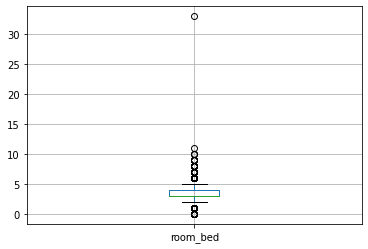

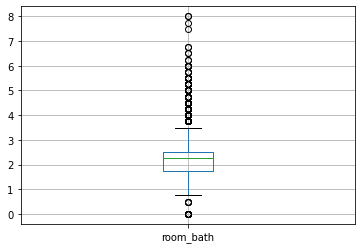

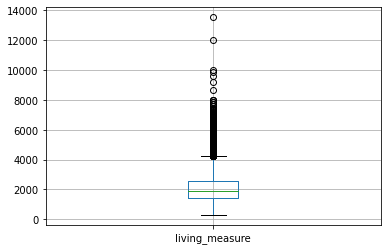

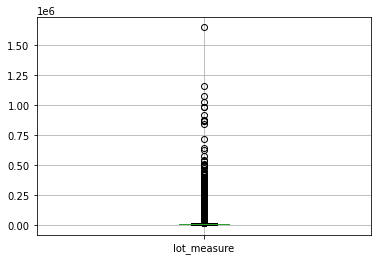

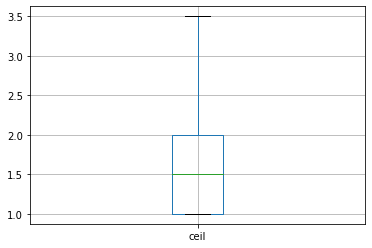

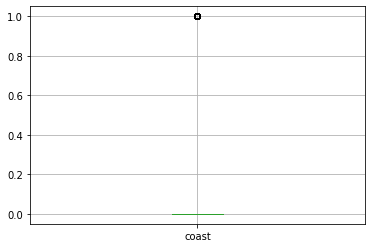

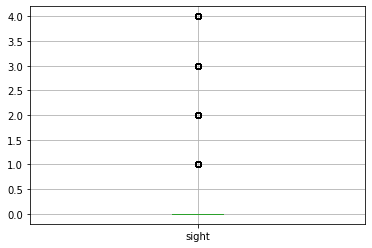

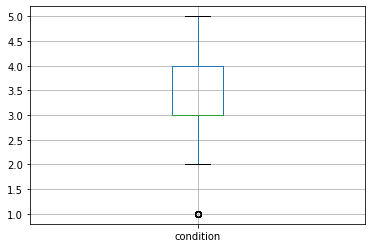

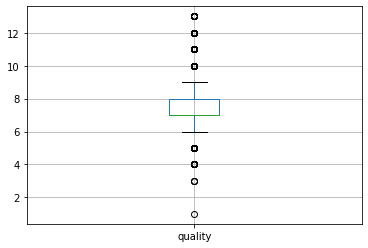

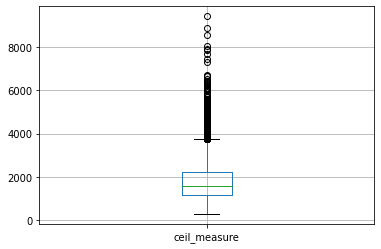

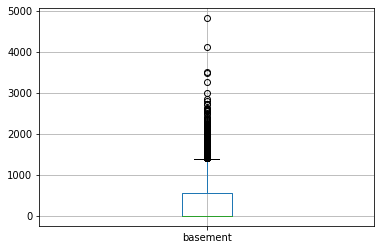

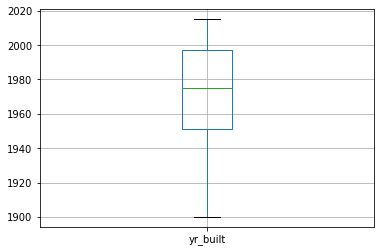

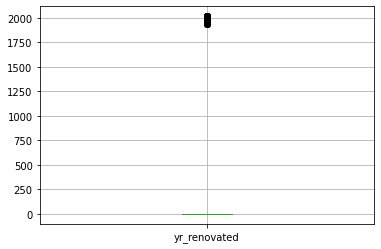

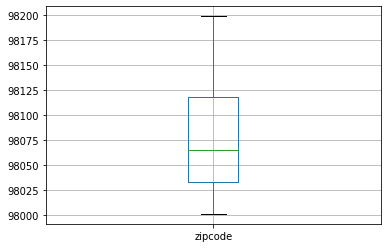

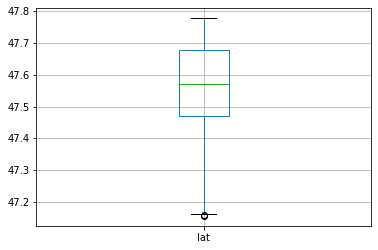

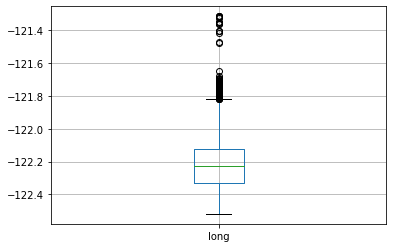

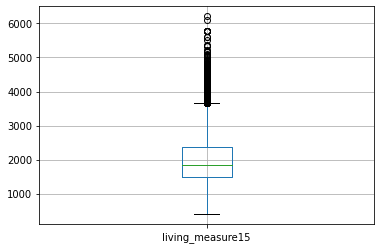

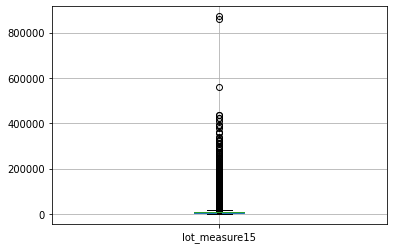

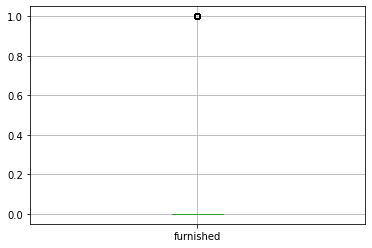

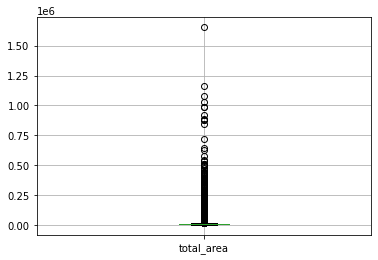

In [23]:
# boxplot all the numerical columns and see if there any outliers
for i in df.drop(['dayhours'],axis=1).iloc[:, 2:].columns:
    df.iloc[:, 1:].boxplot(column=i)
    plt.show()

There are lots of feature which are having outliers. 

# Analysis of CID

In [24]:
cid_count=df.cid.value_counts()
cid_count[cid_count>1].shape[0]

176

There are multiple properties which are sold multiple times.

# Analysis of dayhours

### Adding a new column for analyzing the data on month and year level

In [25]:
# converting the new dataframe for modeling purpose and converting the dayhours into month-year for further analysis

df_new=df.copy()
df.dayhours=df.dayhours.str.replace('T000000', "")
df.dayhours=pd.to_datetime(df.dayhours,format='%Y%m%d')
df['month/year']=df['dayhours'].apply(lambda x: x.strftime('%B/%Y'))


In [26]:
df['month/year'].value_counts()

April/2015        2231
July/2014         2211
June/2014         2180
August/2014       1940
October/2014      1878
March/2015        1875
September/2014    1774
May/2014          1768
December/2014     1471
November/2014     1411
February/2015     1250
January/2015       978
May/2015           646
Name: month/year, dtype: int64

<AxesSubplot:xlabel='month/year', ylabel='count'>

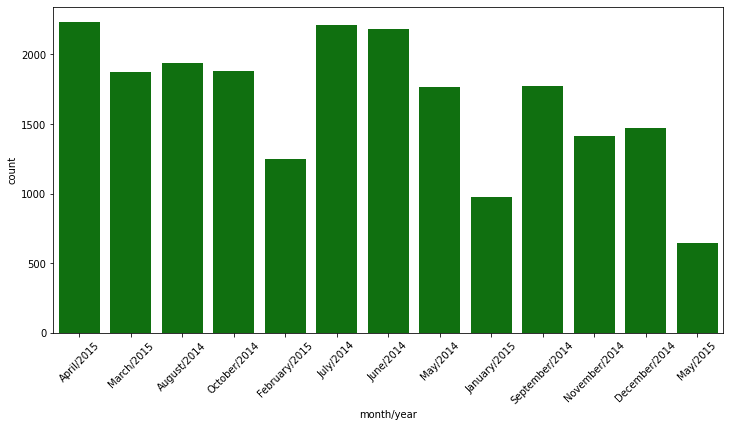

In [27]:
plt.figure(figsize=(12,6))
plt.xticks(rotation = 45)
sns.countplot(df['month/year'],color='green')

From the above, we can conclude that in april 2015 and june and july of 2014 most houses are sold

In [28]:
df.groupby(['month/year'])['price'].agg('mean')

month/year
April/2015        561933.463021
August/2014       536527.039691
December/2014     524602.893270
February/2015     507919.603200
January/2015      525963.251534
July/2014         544892.161013
June/2014         558123.736239
March/2015        544057.683200
May/2014          548166.600113
May/2015          558193.095975
November/2014     522058.861800
October/2014      539127.477636
September/2014    529315.868095
Name: price, dtype: float64

April month have the highest mean price in the time line of the sales of the properties is from May-2014 to May-2015

# Univariant Analysis of each column

# Analysis of room_bed

In [29]:
df['room_bed'].value_counts()

3.0     9875
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: room_bed, dtype: int64

The value of 33 seems to be outlier we need to check the data point before imputing the same 

In [30]:
df[df['room_bed']==33]

cid     price  room_bed  room_bath  living_measure  \
16913  2.402101e+09  640000.0      33.0       1.75          1620.0   

       lot_measure  ceil  coast  sight  condition  ...  yr_renovated  zipcode  \
16913       6000.0   1.0    0.0    0.0        5.0  ...           0.0  98103.0   

           lat     long  living_measure15  lot_measure15  furnished  \
16913  47.6878 -122.331            1330.0         4700.0        0.0   

       total_area   dayhours  month/year  
16913      7620.0 2014-06-25   June/2014  

[1 rows x 24 columns]

We will remove ie later because it is a oultlier

<AxesSubplot:xlabel='room_bed', ylabel='count'>

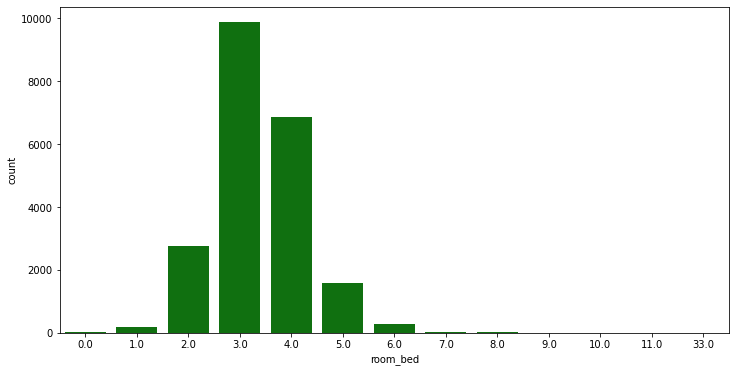

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bed,color='green')

Most of the houses have 3 or 4 bedrooms

# Analysis of room_bath

0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3031
2.00    1917
2.25    2147
2.50    5358
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: room_bath, dtype: int64

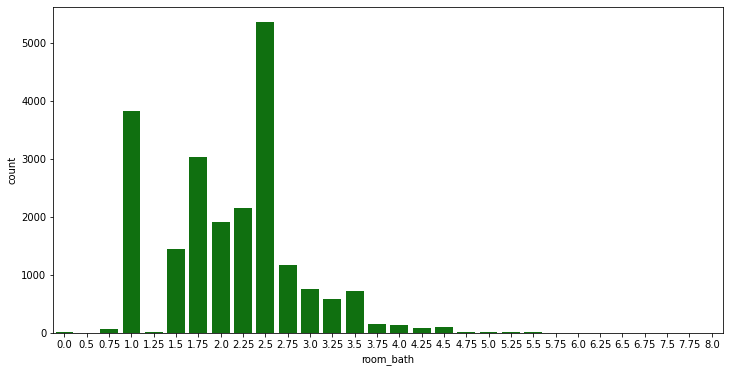

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(df.room_bath,color='green')
df['room_bath'].value_counts().sort_index()

Majority of the houses have bathroom in the range of 1.0 to 2.5

Skewness is : 0.5102509663719975


<AxesSubplot:xlabel='room_bath', ylabel='Density'>

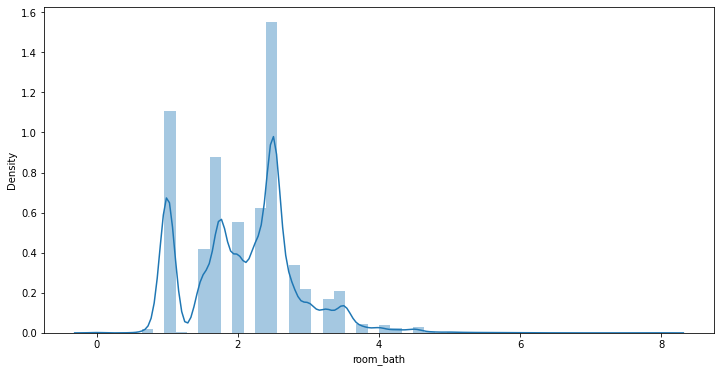

In [33]:
plt.figure(figsize=(12,6))
print("Skewness is :",df.room_bath.skew())
sns.distplot(df.room_bath)

# Analysis of Living measure

Skewness is : 1.4735169838222357


count    21613.000000
mean      2079.727155
std        918.147155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

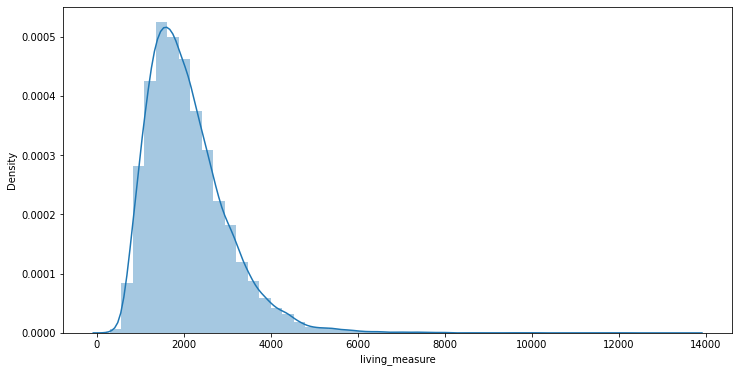

In [34]:
#Data is skewed as visible from plot, as its distribution is normal
plt.figure(figsize=(12,6))
print("Skewness is :",df.living_measure.skew())
sns.distplot(df.living_measure)
df.living_measure.describe()

data is rightly skewed

<AxesSubplot:xlabel='living_measure'>

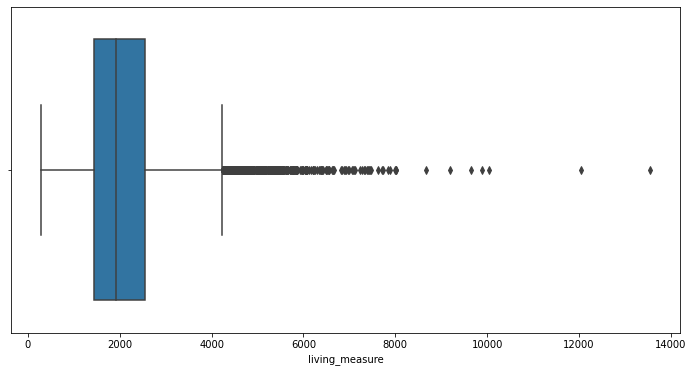

In [35]:
#boxplot for living_measure
plt.figure(figsize=(12,6))
sns.boxplot(df.living_measure)

There are many outliers in living measure. We will handle them later

In [36]:
# checking the no. of data points with Living measure greater than 8000
df[df['living_measure']>8000]

cid      price  room_bed  room_bath  living_measure  \
1068   6.762700e+09  7700000.0       6.0       8.00         12050.0   
1245   1.924059e+09  4670000.0       5.0       6.75          9640.0   
7928   1.225069e+09  2280000.0       7.0       8.00         13540.0   
10639  9.208900e+09  6890000.0       6.0       7.75          9890.0   
10718  9.808701e+09  7060000.0       5.0       4.50         10040.0   
12794  2.470100e+09  5570000.0       5.0       5.75          9200.0   
20038  1.247600e+09  5110000.0       5.0       5.25          8010.0   
20193  2.303900e+09  2890000.0       5.0       6.25          8670.0   
20746  6.072800e+09  3300000.0       5.0       6.25          8020.0   

       lot_measure  ceil  coast  sight  condition  ...  yr_renovated  zipcode  \
1068       27600.0   2.5    0.0    3.0        4.0  ...        1987.0  98102.0   
1245       13068.0   1.0    1.0    4.0        3.0  ...        2009.0  98040.0   
7928      307752.0   3.0    0.0    4.0        3.0  ...           0.0  98053.0   
10639      31374.0   2.0    0.0    4.0        3.0  ...           0.0  98039.0   
10718      37325.0   2.0    1.0    2.0        3.0  ...        2001.0  98004.0   
12794      35069.0   2.0    0.0    0.0        3.0  ...           0.0  98039.0   
20038      45517.0   2.0    1.0    4.0        3.0  ...           0.0  98033.0   
20193      64033.0   2.0    0.0    4.0        3.0  ...        2003.0  98177.0   
20746      21738.0   2.0    0.0    0.0        3.0  ...           0.0  98006.0   

           lat     long  living_measure15  lot_measure15  furnished  \
1068   47.6298 -122.323            3940.0         8800.0        1.0   
1245   47.5570 -122.210            3270.0        10454.0        1.0   
7928   47.6675 -121.986            4850.0       217800.0        1.0   
10639  47.6305 -122.230            4540.0        42730.0        1.0   
10718  47.6500 -122.214            3930.0        25449.0        1.0   
12794  47.6289 -122.233            3560.0        24345.0        1.0   
20038  47.6767 -122.211            3430.0        26788.0        1.0   
20193  47.7295 -122.372            4140.0        81021.0        1.0   
20746  47.5675 -122.189            4160.0        18969.0        1.0   

       total_area   dayhours      month/year  
1068      39650.0 2014-10-13    October/2014  
1245      22708.0 2014-06-17       June/2014  
7928     321292.0 2014-05-05        May/2014  
10639     41264.0 2014-09-19  September/2014  
10718     47365.0 2014-06-11       June/2014  
12794     44269.0 2014-08-04     August/2014  
20038     53527.0 2014-10-20    October/2014  
20193     72703.0 2014-06-11       June/2014  
20746     29758.0 2014-07-02       July/2014  

[9 rows x 24 columns]

We have only 9 houses which have more than 8k living_measure. We will treat them as outliers

# Analysis of lot_measure

Skewness is : 13.084880210575367


count    2.161300e+04
mean     1.509003e+04
std      4.138466e+04
min      5.200000e+02
25%      5.043000e+03
50%      7.618000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

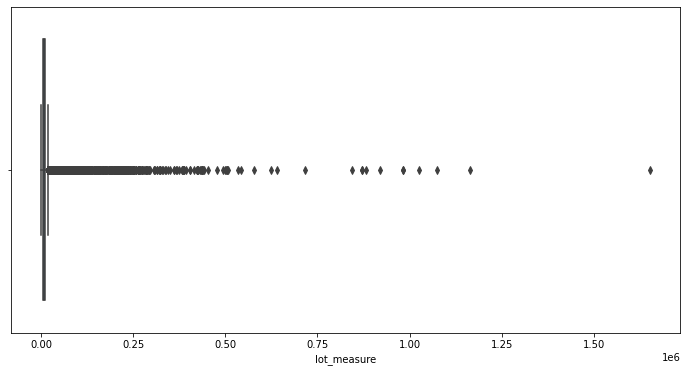

In [37]:
plt.figure(figsize=(12,6))
print("Skewness is :",df.lot_measure.skew())
sns.boxplot(df.lot_measure)
df.lot_measure.describe()

Data is skewed as visible from plot

In [38]:
# checking the no. of data points with Lot measure greater than 1250000
df[df['lot_measure']>1250000]

cid     price  room_bed  room_bath  living_measure  \
11674  1.020069e+09  700000.0       4.0        1.0          1300.0   

       lot_measure  ceil  coast  sight  condition  ...  yr_renovated  zipcode  \
11674    1651359.0   1.0    0.0    3.0        4.0  ...           0.0  98022.0   

           lat     long  living_measure15  lot_measure15  furnished  \
11674  47.2313 -122.023            2560.0       425581.0        0.0   

       total_area   dayhours  month/year  
11674   1652659.0 2015-03-27  March/2015  

[1 rows x 24 columns]

We have only 1 property with more than 12,50,000 lot_measure. We will treat as outlier

# Analysis of ceil

In [39]:
df.ceil.value_counts()

1.0    10719
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: ceil, dtype: int64

most houses have 1 floor

<AxesSubplot:xlabel='ceil', ylabel='count'>

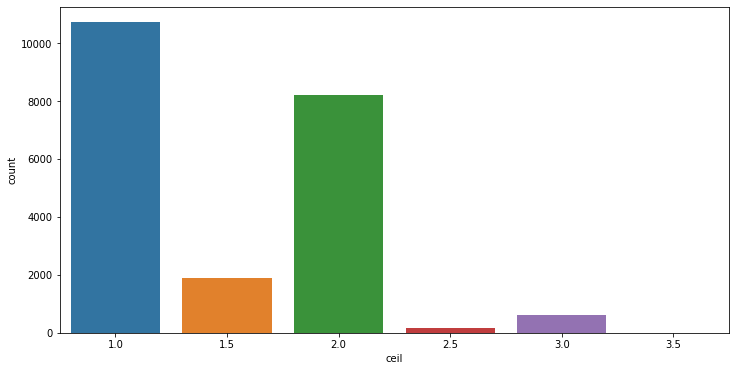

In [40]:
plt.figure(figsize=(12,6))
sns.countplot('ceil',data=df)

Most houses have 1 and 2 floors

# Analysis of coast

In [41]:
df.coast.value_counts()

0.0    21452
1.0      161
Name: coast, dtype: int64

most houses don't have waterfront view, very few are waterfront

# Analysis of sight

In [42]:
df.sight.value_counts()

0.0    19494
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

Most sights have not been viewed 

# Analysis of condition

In [43]:
df.condition.value_counts()

3.0    14063
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: condition, dtype: int64

#Overall most houses are rated as 3 and above for its condition overall

# Analysis of quality 

<AxesSubplot:xlabel='quality', ylabel='count'>

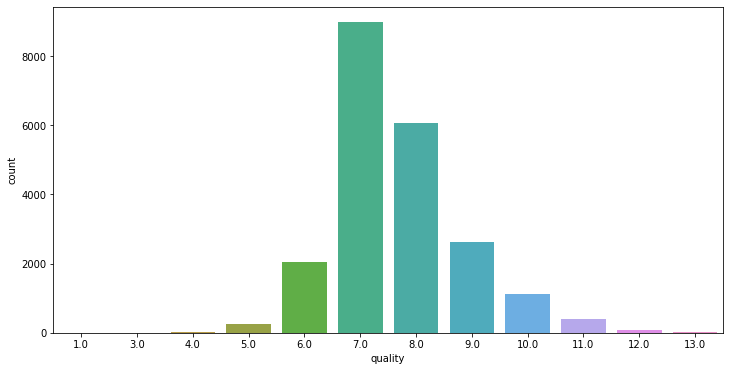

In [44]:
df.quality.value_counts()
plt.figure(figsize=(12,6))
sns.countplot('quality',data=df)

Most properties have quality rating between 6 to 10

In [45]:
#checking for data points with quality rating as 13
df[df['quality']==13]

cid      price  room_bed  room_bath  living_measure  \
388    8.532000e+08  3800000.0       5.0       5.50          7050.0   
1068   6.762700e+09  7700000.0       6.0       8.00         12050.0   
3271   7.237501e+09  1780000.0       4.0       3.25          4890.0   
3649   2.426039e+09  2420000.0       5.0       4.75          7880.0   
4371   1.725059e+09  2390000.0       4.0       4.00          6330.0   
8420   9.831200e+09  2480000.0       5.0       3.75          6810.0   
10639  9.208900e+09  6890000.0       6.0       7.75          9890.0   
10832  4.139900e+09  2340000.0       4.0       2.50          4500.0   
11459  1.068000e+09  3200000.0       6.0       5.00          7100.0   
12794  2.470100e+09  5570000.0       5.0       5.75          9200.0   
16985  2.303900e+09  3800000.0       3.0       4.25          5510.0   
20193  2.303900e+09  2890000.0       5.0       6.25          8670.0   
20547  3.303850e+09  2980000.0       5.0       5.50          7400.0   

       lot_measure  ceil  coast  sight  condition  ...  yr_renovated  zipcode  \
388        42840.0   1.0    0.0    2.0        4.0  ...           0.0  98004.0   
1068       27600.0   2.5    0.0    3.0        4.0  ...        1987.0  98102.0   
3271       13402.0   2.0    0.0    0.0        3.0  ...           0.0  98059.0   
3649       24250.0   2.0    0.0    2.0        3.0  ...           0.0  98177.0   
4371       13296.0   2.0    0.0    2.0        3.0  ...           0.0  98033.0   
8420        7500.0   2.5    0.0    0.0        3.0  ...           0.0  98102.0   
10639      31374.0   2.0    0.0    4.0        3.0  ...           0.0  98039.0   
10832      35200.0   1.0    0.0    0.0        3.0  ...           0.0  98006.0   
11459      18200.0   2.5    0.0    0.0        3.0  ...        2002.0  98199.0   
12794      35069.0   2.0    0.0    0.0        3.0  ...           0.0  98039.0   
16985      35000.0   2.0    0.0    4.0        3.0  ...           0.0  98177.0   
20193      64033.0   2.0    0.0    4.0        3.0  ...        2003.0  98177.0   
20547      18898.0   2.0    0.0    3.0        3.0  ...           0.0  98006.0   

           lat     long  living_measure15  lot_measure15  furnished  \
388    47.6229 -122.220            5070.0        20570.0        1.0   
1068   47.6298 -122.323            3940.0         8800.0        1.0   
3271   47.5303 -122.131            5790.0        13539.0        1.0   
3649   47.7334 -122.362            2740.0        10761.0        1.0   
4371   47.6488 -122.201            2200.0         9196.0        1.0   
8420   47.6285 -122.322            2660.0         7500.0        1.0   
10639  47.6305 -122.230            4540.0        42730.0        1.0   
10832  47.5477 -122.126            4760.0        35200.0        1.0   
11459  47.6427 -122.408            3130.0         6477.0        1.0   
12794  47.6289 -122.233            3560.0        24345.0        1.0   
16985  47.7296 -122.370            3430.0        45302.0        1.0   
20193  47.7295 -122.372            4140.0        81021.0        1.0   
20547  47.5431 -122.112            6110.0        26442.0        1.0   

       total_area   dayhours      month/year  
388       49890.0 2014-07-01       July/2014  
1068      39650.0 2014-10-13    October/2014  
3271      18292.0 2014-10-10    October/2014  
3649      32130.0 2015-01-30    January/2015  
4371      19626.0 2014-11-20   November/2014  
8420      14310.0 2015-03-04      March/2015  
10639     41264.0 2014-09-19  September/2014  
10832     39700.0 2015-04-20      April/2015  
11459     25300.0 2014-09-23  September/2014  
12794     44269.0 2014-08-04     August/2014  
16985     40510.0 2014-09-11  September/2014  
20193     72703.0 2014-06-11       June/2014  
20547     26298.0 2014-12-12   December/2014  

[13 rows x 24 columns]

There are only 13 propeties which have the highest quality rating

# Analysis of ceil_measure

Skewness is : 1.4468098702392473


count    21613.000000
mean      1788.355989
std        828.084833
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

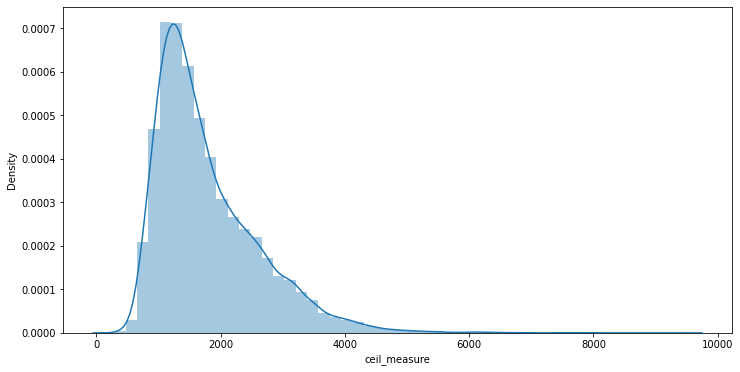

In [46]:
print("Skewness is :", df.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(df.ceil_measure)
df.ceil_measure.describe()

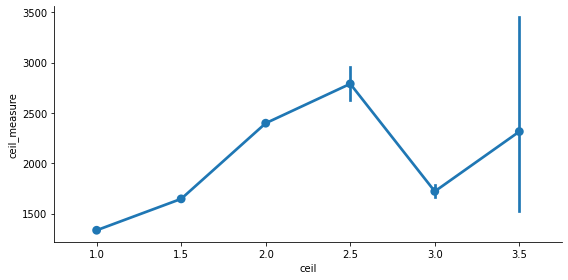

In [47]:
sns.factorplot(x='ceil',y='ceil_measure',data=df, size = 4, aspect = 2)

 There is no pattern in Ceil Vs Ceil_measure and is highly skewed

The vertival lines at each point represent the inter quartile range of values at that point

# Analysis of basement

<AxesSubplot:xlabel='basement', ylabel='Density'>

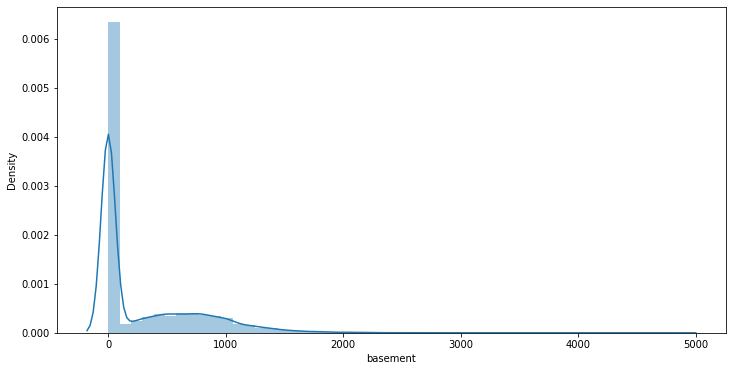

In [48]:
#basement_measure
plt.figure(figsize=(12,6))
sns.distplot(df.basement)

 We can see 2 gaussians, which tells us there are propeties which don't have basements and some have the basements

In [49]:
df[df.basement==0].shape

(13126, 24)

We have almost 60% of the properties without basement

<AxesSubplot:xlabel='basement'>

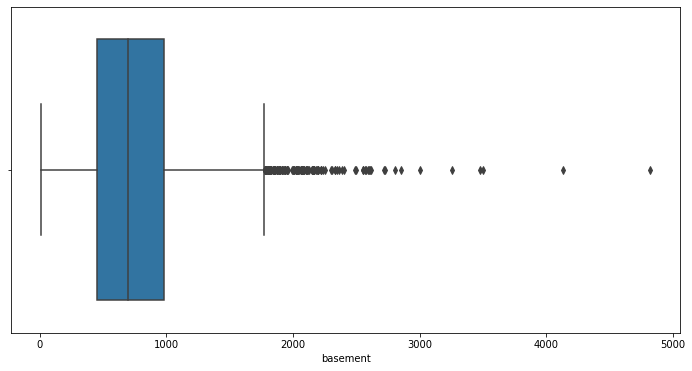

In [50]:
#houses have zero measure of basement i.e. they donot have basements
#let's plot boxplot for properties which have basements only
df_base=df[df['basement']>0]
plt.figure(figsize=(12, 6))
sns.boxplot(df_base['basement'])

 We can clearly see, there are outliers. We need to treat this before our model.

In [51]:
#checking the no. of data points with 'basement' greater than 4000
df[df['basement']>4000]

cid      price  room_bed  room_bath  living_measure  \
1245  1.924059e+09  4670000.0       5.0       6.75          9640.0   
7928  1.225069e+09  2280000.0       7.0       8.00         13540.0   

      lot_measure  ceil  coast  sight  condition  ...  yr_renovated  zipcode  \
1245      13068.0   1.0    1.0    4.0        3.0  ...        2009.0  98040.0   
7928     307752.0   3.0    0.0    4.0        3.0  ...           0.0  98053.0   

          lat     long  living_measure15  lot_measure15  furnished  \
1245  47.5570 -122.210            3270.0        10454.0        1.0   
7928  47.6675 -121.986            4850.0       217800.0        1.0   

      total_area   dayhours  month/year  
1245     22708.0 2014-06-17   June/2014  
7928    321292.0 2014-05-05    May/2014  

[2 rows x 24 columns]

We have only 2 properties with more than 4,000 measure basement

<AxesSubplot:xlabel='basement', ylabel='Density'>

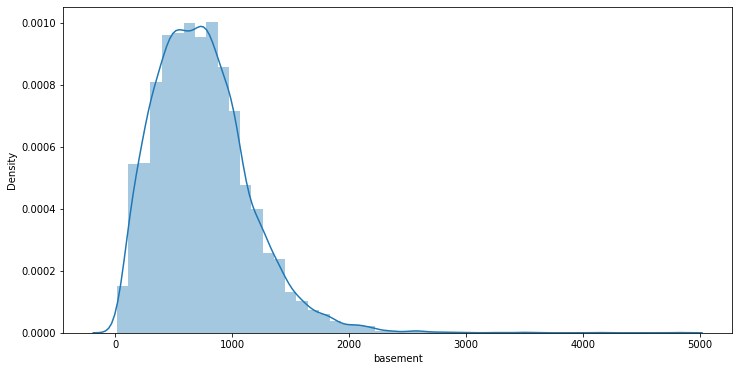

In [52]:
#Distribution of houses having basement
plt.figure(figsize=(12,6))
sns.distplot(df_base.basement)

 Distribution having basement is right-skewed

# Analysis of yr_built

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

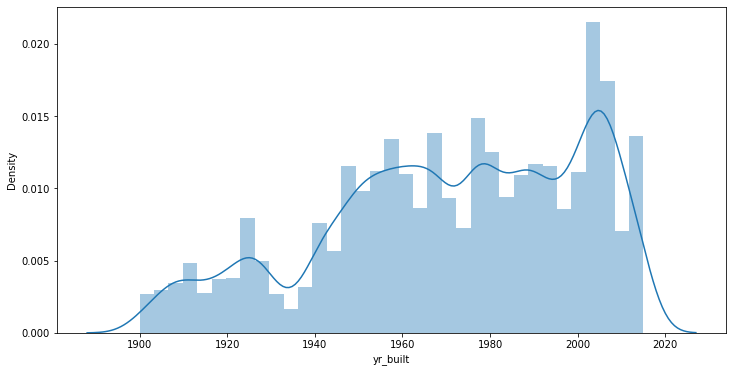

In [53]:
# house range from new to very old
plt.figure(figsize=(12,6))
sns.distplot(df.yr_built)

The built year of the properties range from 1900 to 2014 and we can see upward trend with time

# Analysis of yr_renovated

In [54]:
df[df['yr_renovated']>0].shape

(914, 24)

Only 914 houses were renovated out of 21613 houses

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

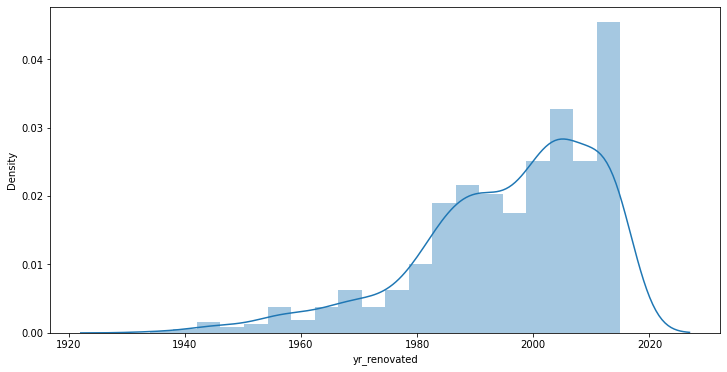

In [55]:
#yr_renovated - plot of houses which are renovated
df_reno=df[df['yr_renovated']>0]
plt.figure(figsize=(12,6))
sns.distplot(df_reno.yr_renovated)

Now will create age column from columns : yr_built & yr_renovated

# Analysis of furnished

0.0    17367
1.0     4246
Name: furnished, dtype: int64

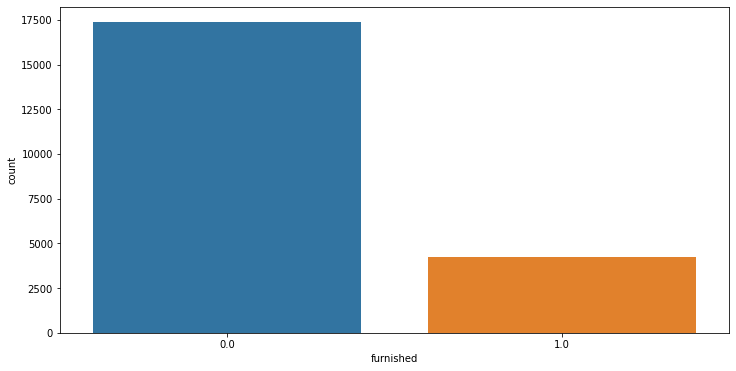

In [56]:
plt.figure(figsize=(12,6))
sns.countplot('furnished',data=df)
df.furnished.value_counts()

 Most properties are not furnished. Furnish column need to be converted into categorical column

# BIVARIATE ANALYSIS

## PairPlot

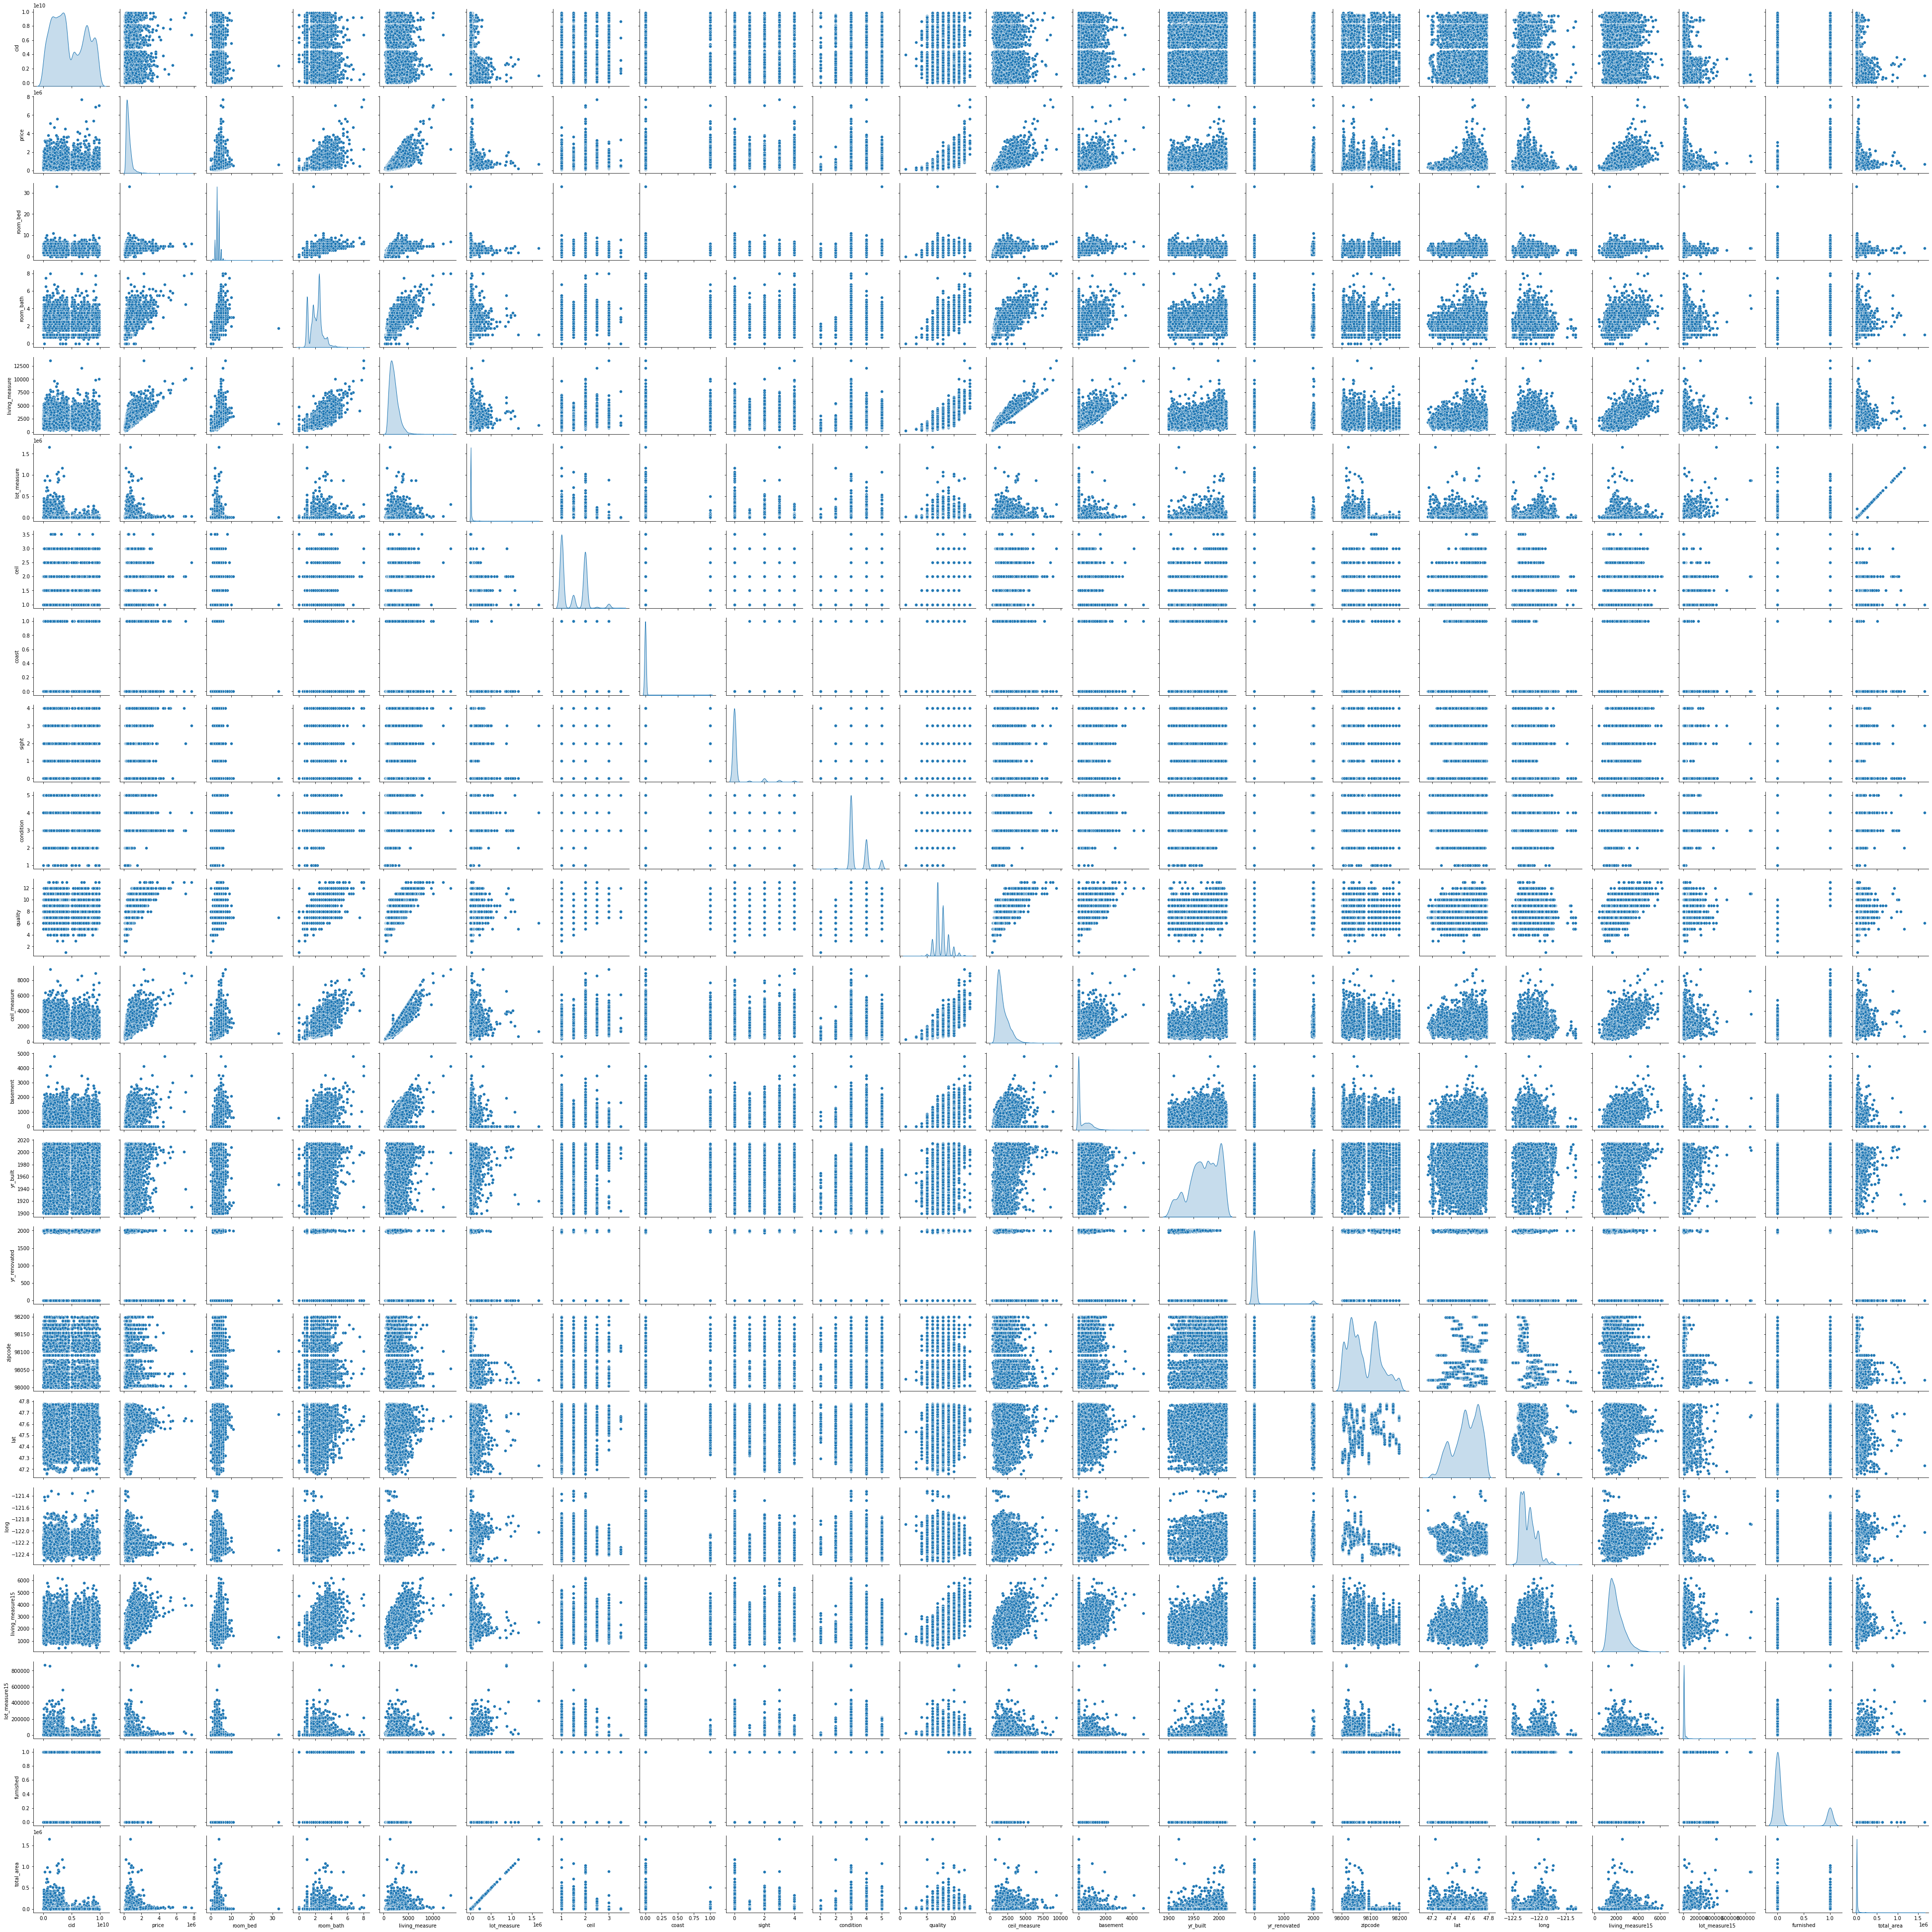

In [57]:
# plot all the variables and confirm our above deduction with more confidence
sns.pairplot(df, diag_kind = 'kde')

From above pair plot, we observed/deduced below 

<ol>
    <li><b>price:</b> price distribution is Right-Skewed as we deduced earlier from our 5-factor analysis</li>
    <li><b>room_bed:</b> our target variable (price) and room_bed plot is not linear. It's distribution have lot of gaussians</li>
    <li><b>room_bath:</b> It's plot with price has <b>somewhat linear relationship</b>. Distribution has number of gaussians.</li>
    <li><b>living_measure:</b> Plot against price has <b>strong linear relationship</b>. It also have linear relationship with room_bath variable. So <b>might remove one of these 2</b>. Distribution is Right-Skewed.
    <li><b>lot_measure: No clear relationship</b> with price.</li>
    <li><b>ceil: No clear relationship</b> with price. We can see, it's <b>have 6 unique values</b> only. Therefore, we can <b>convert this column into categorical column</b> for values.</li>
    <li><b>coast: No clear relationship</b> with price. Clearly it's <b>categorical variable with 2 unique values</b>.</li>
    <li><b>sight: No clear relationship</b> with price. This has <b>5 unique values</b>. Can be <b>converted to Categorical variable</b>.</li>
    <li><b>condition: No clear relationship</b> with price. This has <b>5 unique values</b>. Can be <b>converted to Categorical variable</b>.</li>
    <li><b>quality: Somewhat linear relationship with price</b>. Has <b>discrete values from 1 - 13. Can be converted to Categorical variable</b>.</li>
    <li><b>ceil_measure: Strong linear relationship with price</b>. Also with room_bath and living_measure features. Distribution is <b>Right-Skewed</b>.</li>
    <li><b>basement: No clear relationship</b> with price. </li>
    <li><b>yr_built: No clear relationship</b> with price. </li>
    <li><b>yr_renovated: No clear relationship</b> with price. Have <b>2 unique values. Can be converted to Categorical Variable</b> which tells whether house is renovated or not.</li>
    <li><b>zipcode, lat, long: No clear relationship</b> with price or any other feature.</li>
    <li><b>living_measure15: Somewhat linear relationship with target feature</b>. It's same as living_measure. Therefore we can drop this variable.</li>
    <li><b>lot_measure15: No clear relationship</b> with price or any other feature.</li>
    <li><b>furnished: No clear relationship</b> with price or any other feature. <b> 2 unique values so can be converted to Categorical Variable</b></li>
    <li><b>total_area: No clear relationship with price</b>. But it has <b>Very Strong linear relationship with lot_measure</b>. So one of it can be dropped.</li>
    </ol>

In [58]:
# corelatoin between the different features
corr = df.corr(method ='pearson')
corr

cid     price  room_bed  room_bath  living_measure  \
cid               1.000000 -0.016797  0.001492   0.005768       -0.012151   
price            -0.016797  1.000000  0.307766   0.524509        0.702066   
room_bed          0.001492  0.307766  1.000000   0.515184        0.575776   
room_bath         0.005768  0.524509  0.515184   1.000000        0.753265   
living_measure   -0.012151  0.702066  0.575776   0.753265        1.000000   
lot_measure      -0.131789  0.089676  0.032007   0.087675        0.172728   
ceil              0.019379  0.256385  0.174115   0.496707        0.352695   
coast            -0.004184  0.266042 -0.006080   0.062046        0.102542   
sight             0.011776  0.396999  0.078215   0.186137        0.284366   
condition        -0.024273  0.035556  0.027836  -0.126224       -0.058903   
quality           0.008159  0.667482  0.356037   0.663739        0.762485   
ceil_measure     -0.010812  0.605594  0.476980   0.684131        0.876342   
basement         -0.005151  0.323837  0.301896   0.282696        0.434775   
yr_built          0.021417  0.053872  0.154150   0.505098        0.317757   
yr_renovated     -0.016907  0.126442  0.018437   0.050112        0.055211   
zipcode          -0.008224 -0.053168 -0.152556  -0.203568       -0.199588   
lat              -0.001891  0.306919 -0.009410   0.024578        0.052722   
long              0.020885  0.021532  0.129678   0.222169        0.240062   
living_measure15 -0.003126  0.583825  0.390003   0.566262        0.753594   
lot_measure15    -0.138699  0.082597  0.029413   0.086769        0.183484   
furnished        -0.010099  0.565834  0.258431   0.483681        0.632436   
total_area       -0.131638  0.104849  0.044447   0.103866        0.194168   

                  lot_measure      ceil     coast     sight  condition  ...  \
cid                 -0.131789  0.019379 -0.004184  0.011776  -0.024273  ...   
price                0.089676  0.256385  0.266042  0.396999   0.035556  ...   
room_bed             0.032007  0.174115 -0.006080  0.078215   0.027836  ...   
room_bath            0.087675  0.496707  0.062046  0.186137  -0.126224  ...   
living_measure       0.172728  0.352695  0.102542  0.284366  -0.058903  ...   
lot_measure          1.000000 -0.005410  0.021167  0.074982  -0.008546  ...   
ceil                -0.005410  1.000000  0.024136  0.028945  -0.262111  ...   
coast                0.021167  0.024136  1.000000  0.400220   0.017683  ...   
sight                0.074982  0.028945  0.400220  1.000000   0.046519  ...   
condition           -0.008546 -0.262111  0.017683  0.046519   1.000000  ...   
quality              0.113830  0.457346  0.082515  0.250867  -0.144749  ...   
ceil_measure         0.183413  0.522215  0.071330  0.167393  -0.158328  ...   
basement             0.015364 -0.244864  0.079239  0.277243   0.173736  ...   
yr_built             0.052940  0.487212 -0.025856 -0.052722  -0.360606  ...   
yr_renovated         0.007672  0.005351  0.088358  0.102980  -0.060494  ...   
zipcode             -0.129243 -0.058419  0.030289  0.084386   0.003040  ...   
lat                 -0.085940  0.050372 -0.014139  0.006001  -0.015471  ...   
long                 0.228884  0.124882 -0.042021 -0.078051  -0.106618  ...   
living_measure15     0.145003  0.277405  0.086221  0.280910  -0.093187  ...   
lot_measure15        0.716048 -0.011396  0.030727  0.072979  -0.002959  ...   
furnished            0.119169  0.347236  0.069571  0.219898  -0.122410  ...   
total_area           0.998169  0.002364  0.023407  0.080998  -0.009800  ...   

                  basement  yr_built  yr_renovated   zipcode       lat  \
cid              -0.005151  0.021417     -0.016907 -0.008224 -0.001891   
price             0.323837  0.053872      0.126442 -0.053168  0.306919   
room_bed          0.301896  0.154150      0.018437 -0.152556 -0.009410   
room_bath         0.282696  0.505098      0.050112 -0.203568  0.024578   
living_measure    0.434775  0.317757      0.055211 -0.199588  0

 We have linear relationships in below featues as we got to know from above matrix

<ol>
    <li><b>price</b>: room_bath, living_measure, quality, living_measure15, furnished</li>
    <li><b>living_measure</b>: price, room_bath. So we can consider dropping 'room_bath' variable.</li>
    <li><b>quality</b>: price, room_bath, living_measure</li>
    <li><b>ceil_measure</b>: price, room_bath, living_measure, quality</li>
    <li><b>living_measure15</b>: price, living_measure, quality. So we can  consider dropping living_measure15 as well. As it's giving same info as living_measure.</li>
    <li><b>lot_measure15</b>: lot_measure. Therefore, we can consider dropping lot_measure15, as it's giving same info.</li>
    <li><b>furnished</b>: quality</li>
    <li><b>total_area</b>: lot_measure, lot_measure15. Therefore, we can consider dropping total_area feature as well. As it's giving same info as lot_measure.</li>
</ol>

We can plot heatmap and can easily confirm our above findings

<AxesSubplot:>

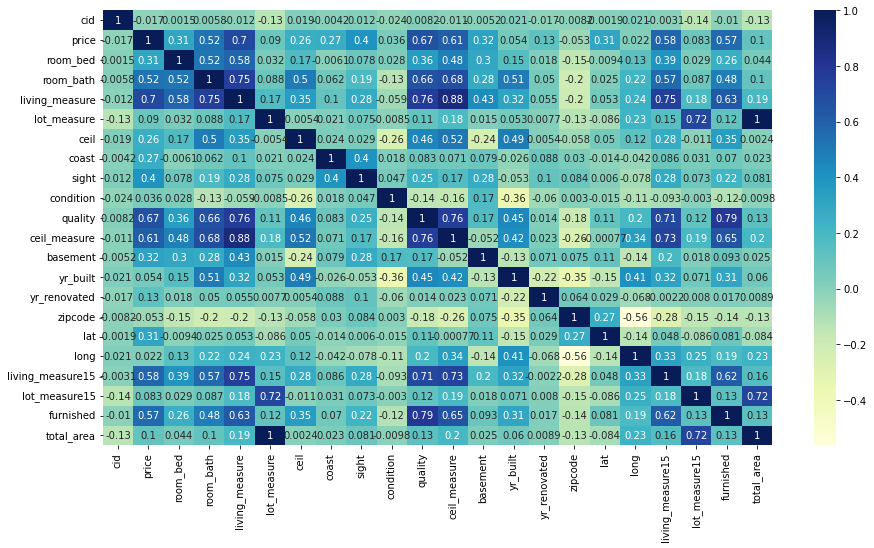

In [59]:
# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(corr,cmap="YlGnBu",annot=True)

# Bivariate Analysis of  month_year

mean    median  size
month/year                                   
April/2015      561933.463021  476500.0  2231
August/2014     536527.039691  442100.0  1940
December/2014   524602.893270  432500.0  1471
February/2015   507919.603200  425545.0  1250
January/2015    525963.251534  438500.0   978
July/2014       544892.161013  465000.0  2211
June/2014       558123.736239  465000.0  2180
March/2015      544057.683200  450000.0  1875
May/2014        548166.600113  465000.0  1768
May/2015        558193.095975  455000.0   646
November/2014   522058.861800  435000.0  1411
October/2014    539127.477636  446900.0  1878
September/2014  529315.868095  450000.0  1774

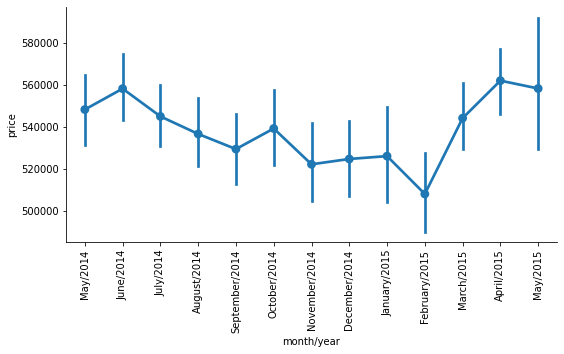

In [61]:
df['month/year'] = pd.to_datetime(df['month/year'], format='%B/%Y')
df.sort_values(["month/year"], axis=0, ascending=True, inplace=True) 
df["month/year"] = df["month/year"].dt.strftime('%B/%Y')
sns.factorplot(x='month/year',y='price',data=df, size=4, aspect=2)
plt.xticks(rotation=90)
df.groupby('month/year')['price'].agg(['mean','median','size'])

 The mean price of the houses tend to be high during March,April, May as compared to that of September, October, November,December period.

# Bivariate Analysis of  room_bed

mean    median  size
room_bed                              
0.0       4.102231e+05  288000.0    13
1.0       3.189286e+05  299000.0   197
2.0       4.013572e+05  373500.0  2747
3.0       4.667563e+05  414500.0  9875
4.0       6.357284e+05  549950.0  6854
5.0       7.867329e+05  619000.0  1595
6.0       8.274895e+05  652500.0   270
7.0       9.514478e+05  728580.0    38
8.0       1.105077e+06  700000.0    13
9.0       8.939998e+05  817000.0     6
10.0      8.200000e+05  660000.0     3
11.0      5.200000e+05  520000.0     1
33.0      6.400000e+05  640000.0     1

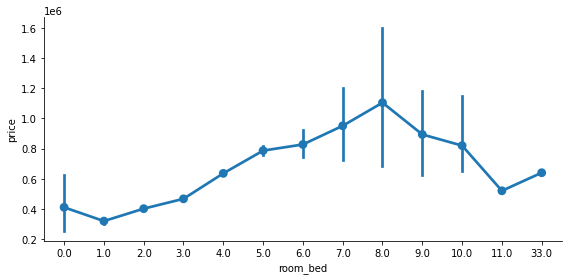

In [62]:
sns.factorplot(x='room_bed',y='price',data=df, size=4, aspect=2)
df.groupby('room_bed')['price'].agg(['mean','median','size'])

There is clear increasing trend in price with room_bed

mean     median  size
room_bath                               
0.00       4.490950e+05   317500.0    10
0.50       2.373750e+05   264000.0     4
0.75       2.945209e+05   273500.0    72
1.00       3.470889e+05   320000.0  3829
1.25       6.217722e+05   516500.0     9
1.50       4.091834e+05   370000.0  1439
1.75       4.549409e+05   422800.0  3031
2.00       4.575184e+05   422500.0  1917
2.25       5.325099e+05   470000.0  2147
2.50       5.536595e+05   499950.0  5358
2.75       6.605538e+05   605000.0  1178
3.00       7.087325e+05   600000.0   750
3.25       9.710299e+05   837352.0   588
3.50       9.329520e+05   823250.0   726
3.75       1.198179e+06  1070000.0   155
4.00       1.271616e+06  1060000.0   135
4.25       1.535072e+06  1390000.0    78
4.50       1.334211e+06  1060000.0   100
4.75       2.022300e+06  2300000.0    23
5.00       1.674167e+06  1430000.0    21
5.25       1.817962e+06  1420000.0    13
5.50       2.522500e+06  2340000.0    10
5.75       2.492500e+06  1930000.0     4
6.00       2.948333e+06  2895000.0     6
6.25       3.095000e+06  3095000.0     2
6.50       1.710000e+06  1710000.0     2
6.75       2.735000e+06  2735000.0     2
7.50       4.500000e+05   450000.0     1
7.75       6.890000e+06  6890000.0     1
8.00       4.990000e+06  4990000.0     2

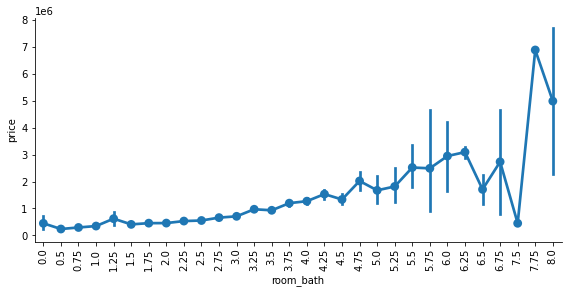

In [63]:
sns.factorplot(x='room_bath',y='price',data=df,size=4, aspect=2)
plt.xticks(rotation=90)
df.groupby('room_bath')['price'].agg(['mean','median','size'])

Outliers are there. Overall mean and median price increares with increasing room_bath<br>
There is upward trend in price with increase in room_bath

# Bivariate Analysis of living_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      2079.727155
std        918.147155
min        290.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: living_measure, dtype: float64

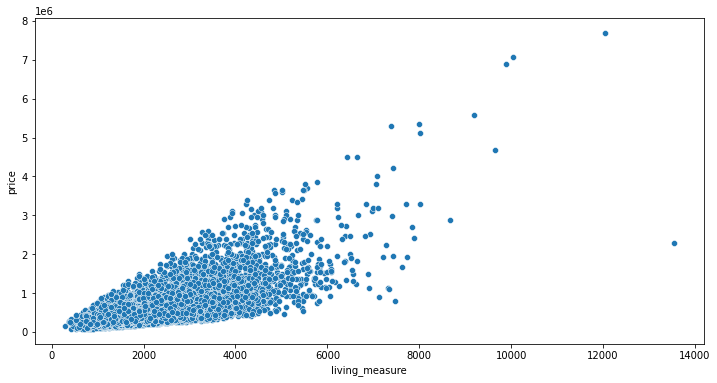

In [64]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price']))
df['living_measure'].describe()

There is clear increment in price of the property with increment in the living measure But there seems to be one outlier to this trend. Need to evaluate the same

# Bivariate Analysis of lot_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    2.161300e+04
mean     1.509003e+04
std      4.138466e+04
min      5.200000e+02
25%      5.043000e+03
50%      7.618000e+03
75%      1.066000e+04
max      1.651359e+06
Name: lot_measure, dtype: float64

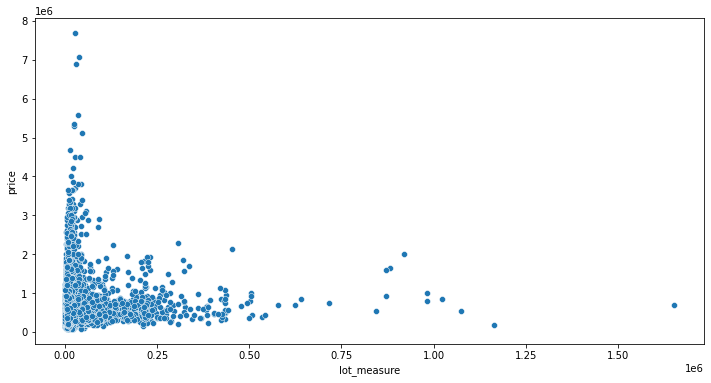

In [65]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['lot_measure'],df['price']))
df['lot_measure'].describe()

There seems to be no relation between lot_measure and price.<br>
Data value range is very large so breaking it get better view.<br>
There doesnt seem to be no relation between lot_measure and price trend

AxesSubplot(0.125,0.125;0.775x0.755)


count    19717.000000
mean      7760.594817
std       4245.511393
min        520.000000
25%       5000.000000
50%       7260.000000
75%       9612.000000
max      24969.000000
Name: lot_measure, dtype: float64

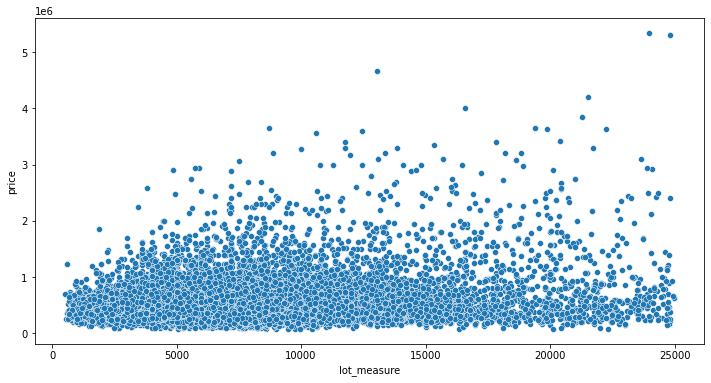

In [66]:
#lot_measure <25000
plt.figure(figsize=(12,6))
x=df[df['lot_measure']<25000]
print(sns.scatterplot(x['lot_measure'],x['price']))
x['lot_measure'].describe()

 Almost 95% of the houses have <25000 lot_measure. But there is no clear trend between lot_measure and price

AxesSubplot(0.125,0.125;0.775x0.755)


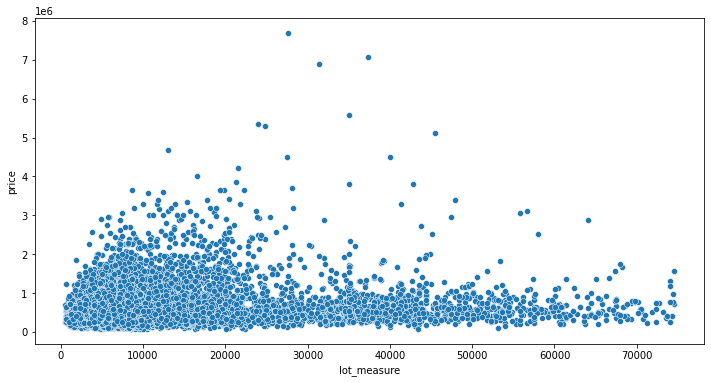

In [67]:
#lot_measure >100000 
plt.figure(figsize=(12,6))
y=df[df['lot_measure']<=75000]
print(sns.scatterplot(y['lot_measure'],y['price']))

price increases with increase in living measure

# Bivariate Analysis of  ceil

mean    median   size
ceil                               
1.0   4.427711e+05  390000.0  10719
1.5   5.593744e+05  525000.0   1905
2.0   6.491210e+05  543250.0   8210
2.5   1.061021e+06  799200.0    161
3.0   5.831248e+05  490500.0    610
3.5   9.339375e+05  534500.0      8

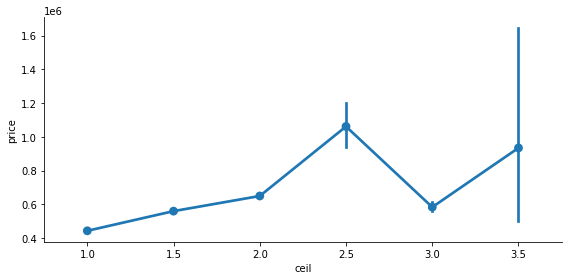

In [68]:
print(sns.factorplot(x='ceil',y='price',data=df, size = 4, aspect = 2))
df.groupby('ceil')['price'].agg(['mean','median','size'])

Median price increases initially and then falls<br>
There is some slight upward trend in price with the ceil

# Bivariate Analysis of  coast

living_measure                   price              
              median         mean     median          mean
coast                                                     
0.0           1910.0  2071.571042   450000.0  5.317155e+05
1.0           2830.0  3166.465839  1410000.0  1.668301e+06

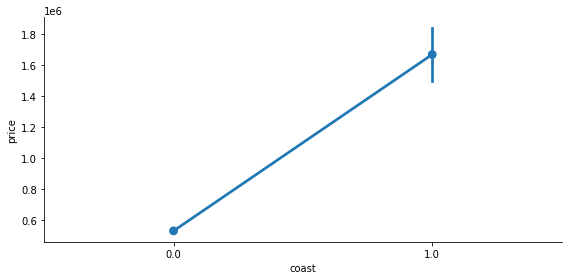

In [69]:
print(sns.factorplot(x='coast',y='price',data=df, size = 4, aspect = 2))
df.groupby('coast')['living_measure','price'].agg(['median','mean'])

Mean and median of waterfront view is high however such houses are very small in compare to non-waterfront<br>
Also, living_measure mean and median is greater for waterfront house.<br>
The house properties with water_front tend to have higher price compared to that of non-water_front properties

price                   living_measure               
               mean     median   size           mean  median   size
sight                                                              
0.0    4.967417e+05   432500.0  19494    1997.843285  1850.0  19494
1.0    8.125186e+05   690944.0    332    2568.960843  2420.0    332
2.0    7.918609e+05   675000.0    959    2652.881126  2450.0    959
3.0    9.724684e+05   802500.0    510    3018.564706  2840.0    510
4.0    1.466554e+06  1190000.0    318    3354.433962  3070.0    318

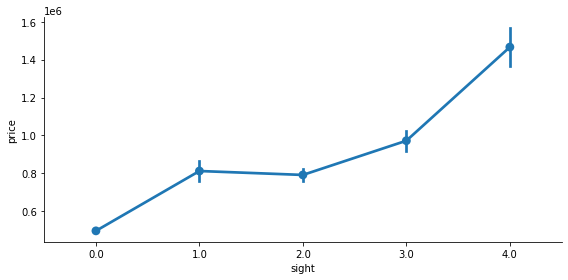

In [70]:
print(sns.factorplot(x='sight',y='price',data=df, size = 4, aspect = 2))
df.groupby('sight')['price','living_measure'].agg(['mean','median','size'])

It contains have outliers. <br>
The house sighted more have high price (mean and median) and have large living area as well.<br>
Properties with higher price have more no.of sights compared to that of houses with lower price

AxesSubplot(0.125,0.125;0.775x0.755)


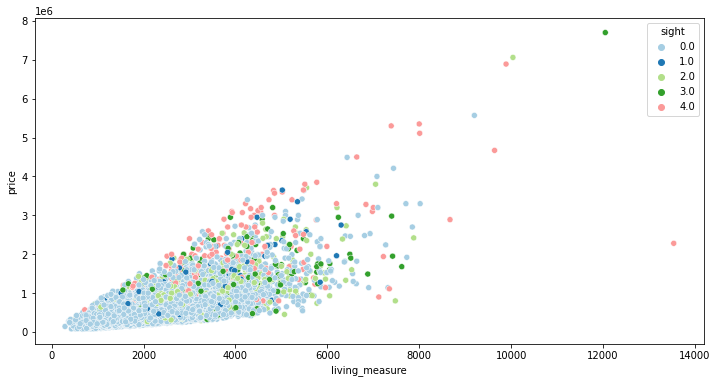

In [71]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['sight'],palette='Paired',legend='full'))

Viewed in relation with price and living_measure<br>
Costlier houses with large living area are sighted more.<br>
The above graph also justify that: Properties with higher price have more no.of sights compared to that of houses with lower price

# Bivariate Analysis of  condition

price                  living_measure               
                    mean    median   size           mean  median   size
condition                                                              
1.0        334431.666667  262500.0     30    1216.000000  1000.0     30
2.0        326423.327485  279000.0    171    1414.152047  1330.0    171
3.0        542364.148048  451000.0  14063    2148.572780  1970.0  14063
4.0        520643.219275  440000.0   5655    1950.352255  1820.0   5655
5.0        612515.489965  525444.0   1694    2022.563164  1880.0   1694

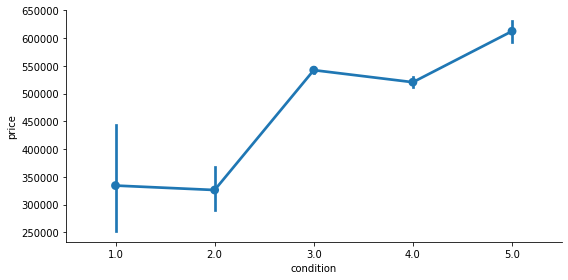

In [72]:
print(sns.factorplot(x='condition',y='price',data=df, size = 4, aspect = 2))
df.groupby('condition')['price','living_measure'].agg(['mean','median','size'])

As the condition rating increases its price and living measure mean and median also increases.<br>
The price of the house increases with condition rating of the house

AxesSubplot(0.125,0.125;0.775x0.755)


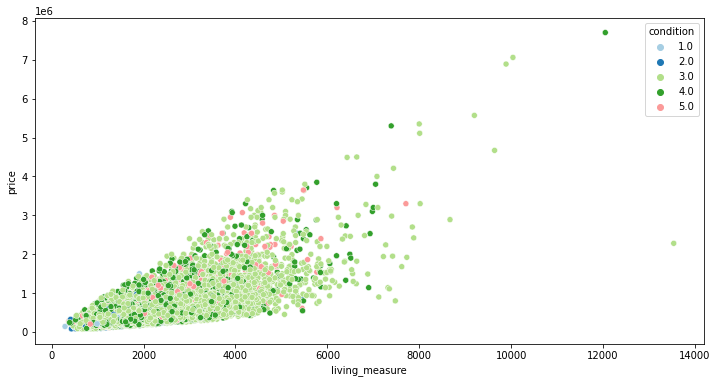

In [73]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['condition'],palette='Paired',legend='full'))

Viewed in relation with price and living_measure. Most houses are rated as 3 or more.<br>
We can see some outliers as well<br>
So we found out that smaller houses are in better condition and better condition houses are having higher prices

# Bivariate Analysis of  quality

price                  living_measure              
                 mean     median  size           mean  median  size
quality                                                            
1.0      1.420000e+05   142000.0     1     290.000000   290.0     1
3.0      2.056667e+05   262000.0     3     596.666667   600.0     3
4.0      2.143810e+05   205000.0    29     660.482759   660.0    29
5.0      2.485240e+05   228700.0   242     983.326446   905.0   242
6.0      3.019166e+05   275276.5  2038    1192.096173  1120.0  2038
7.0      4.025850e+05   375000.0  8982    1689.795703  1630.0  8982
8.0      5.429310e+05   510000.0  6067    2184.126257  2150.0  6067
9.0      7.737382e+05   720000.0  2615    2866.572084  2820.0  2615
10.0     1.072347e+06   914327.0  1134    3520.299824  3450.0  1134
11.0     1.497792e+06  1280000.0   399    4395.448622  4260.0   399
12.0     2.192500e+06  1820000.0    90    5471.588889  4965.0    90
13.0     3.710769e+06  2980000.0    13    7483.076923  7100.0    13

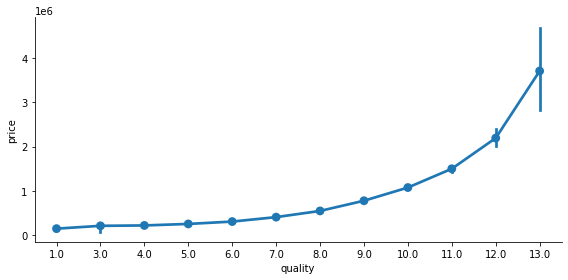

In [74]:
print(sns.factorplot(x='quality',y='price',data=df, size = 4, aspect = 2))
df.groupby('quality')['price','living_measure'].agg(['mean','median','size'])

With grade increase price and living_measure increase (mean and median)<br>
There is clear increase in price of the house with higher rating on quality

AxesSubplot(0.125,0.125;0.775x0.755)


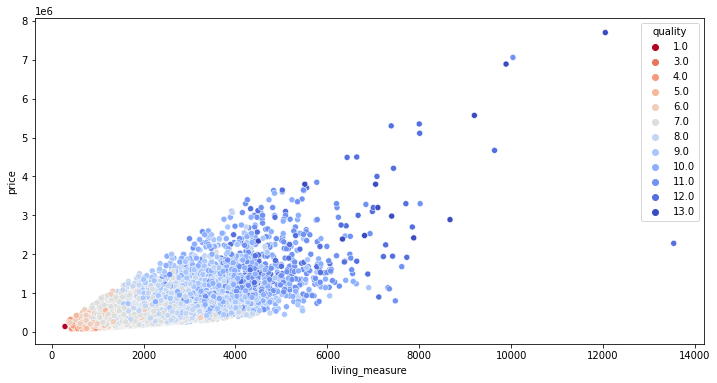

In [75]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['quality'],palette='coolwarm_r', legend='full'))

Viewed in relation with price and living_measure. Most houses are graded as 6 or more.<br>
We can see some outliers as well 

# Bivariate Analysis of  ceil_measure

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean      1788.355989
std        828.084833
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: ceil_measure, dtype: float64

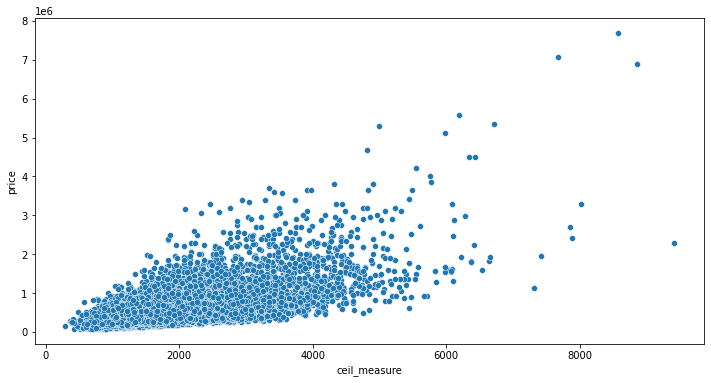

In [76]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['ceil_measure'],df['price']))
df['ceil_measure'].describe()

There is upward trend in price with ceil_measure

# Bivariate Analysis of basement

AxesSubplot(0.125,0.125;0.775x0.755)


count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: basement, dtype: float64

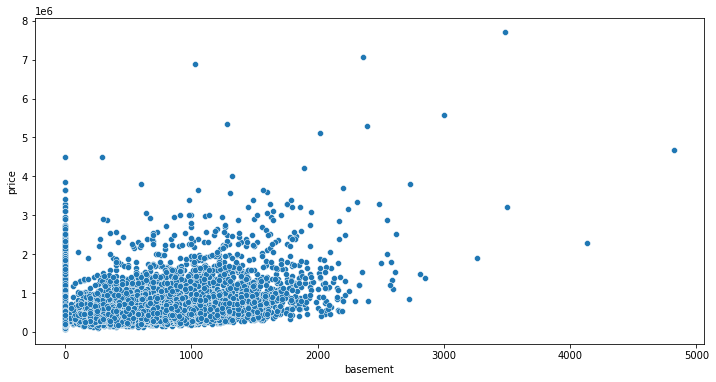

In [77]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['basement'],df['price']))
df['basement'].describe()

 We will create the categorical variable for basement 'has_basement' for houses with basement and no basement.This categorical variable will be used for further analysis.<br>
 Price increases with increase in ceil measure

### Adding a new caegorical variable for looking into the data which houses are having basements and which are not

In [78]:
# Making bins for basements
def create_basement_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_basement'] = df['basement'].apply(create_basement_group)

price                  living_measure               
                       mean    median   size           mean  median   size
has_basement                                                              
No            486945.394789  411500.0  13126    1928.891818  1740.0  13126
Yes           622518.174384  515000.0   8487    2313.009191  2100.0   8487

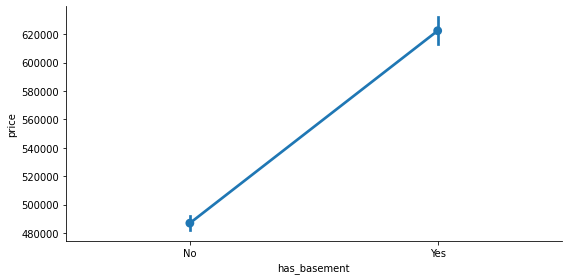

In [79]:
print(sns.factorplot(x='has_basement',y='price',data=df, size = 4, aspect = 2))
df.groupby('has_basement')['price','living_measure'].agg(['mean','median','size'])

After binning we data shows with basement houses are costlier and have higher<br>
The houses with basement has better price compared to that of houses without basement

AxesSubplot(0.125,0.125;0.775x0.755)


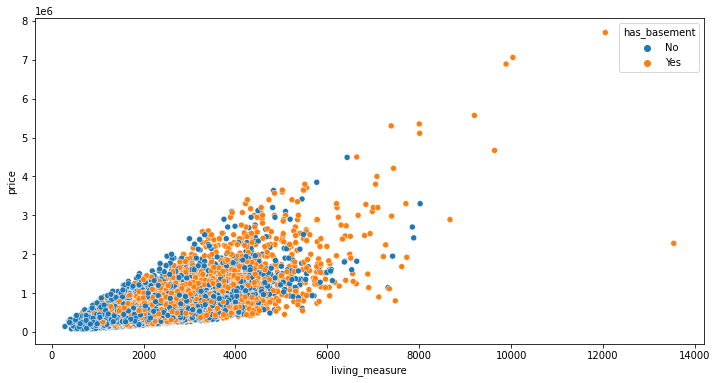

In [80]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['has_basement']))

houses having basement have higher price & living measure

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_built                               
1900.0    581536.632184  549000.0    87
1901.0    557108.344828  550000.0    29
1902.0    673192.592593  624000.0    27
1903.0    480958.195652  461000.0    46
1904.0    583867.755556  478000.0    45
...                 ...       ...   ...
2011.0    544648.384615  440000.0   130
2012.0    527436.982353  448475.0   170
2013.0    678599.582090  565000.0   201
2014.0    683792.685152  599000.0   559
2015.0    762970.162162  628000.0    37

[116 rows x 3 columns]

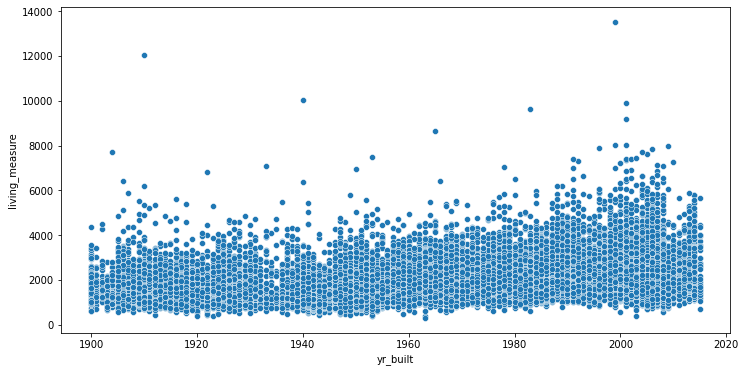

In [81]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['yr_built'],df['living_measure']))
df.groupby('yr_built')['price'].agg(['mean','median','size'])

We will create new variable: Houselandratio - This is proportion of living area in the total area of the house. We will explore the trend of price against this houselandratio.

### Creating a new column for calculating the percentage of living space in the house

In [82]:
df["house_land_ratio"]=np.round((df['living_measure']/df['total_area']),2)*100
df["house_land_ratio"].head()

12235    16.0
14791    35.0
1742     17.0
17829    27.0
14810    17.0
Name: house_land_ratio, dtype: float64

# Bivariate Analysis of  yr_renovated

AxesSubplot(0.125,0.125;0.775x0.755)


mean    median  size
yr_renovated                               
1934.0        459950.000000  459950.0     1
1940.0        378400.000000  378400.0     2
1944.0        521000.000000  521000.0     1
1945.0        398666.666667  375000.0     3
1946.0        351137.500000  351137.5     2
...                     ...       ...   ...
2011.0        607496.153846  577000.0    13
2012.0        625181.818182  515000.0    11
2013.0        664960.810811  560000.0    37
2014.0        655030.098901  575000.0    91
2015.0        659156.250000  651000.0    16

[69 rows x 3 columns]

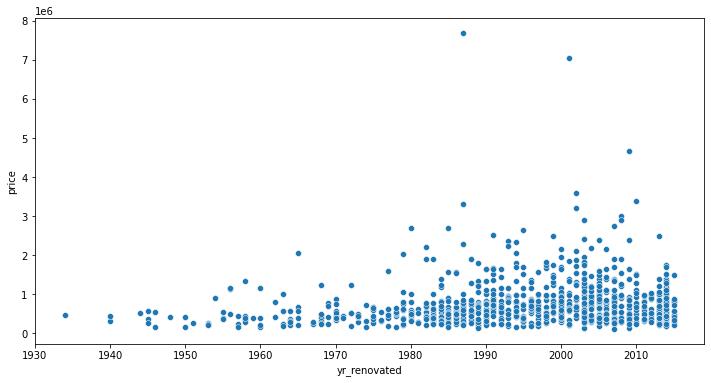

In [83]:
plt.figure(figsize=(12,6))
x=df[df['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])

 So most houses are renovated after 1980's. We will create new categorical variable 'has_renovated' to categorize the property as renovated and non-renovated. For further ananlysis we will use this categorical variable.

### Creating new categorical column for looking that a house is renovated or not

In [84]:
def renovated_group(series):
    if series == 0:
        return "No"
    elif series > 0:
        return "Yes"
    
df['has_renovated'] = df['yr_renovated'].apply(renovated_group)

AxesSubplot(0.125,0.125;0.775x0.755)


price                  house_land_ratio              
                        mean    median   size             mean median   size
has_renovated                                                               
No             530447.958597  448000.0  20699        22.069424   20.0  20699
Yes            760628.777899  600000.0    914        22.271335   21.0    914

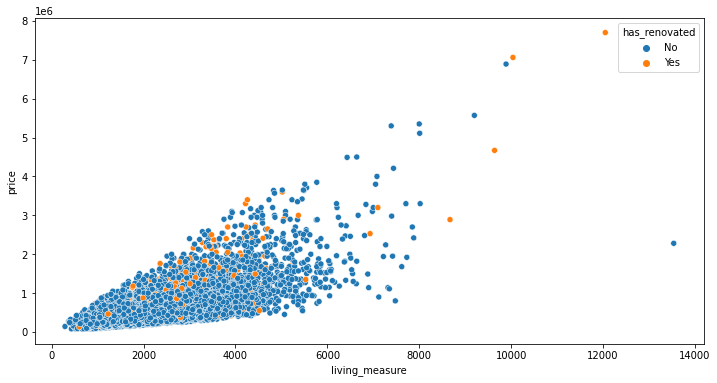

In [85]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['has_renovated']))
df.groupby(['has_renovated'])['price','house_land_ratio'].agg(['mean','median','size'])

Renovated have higher mean and median, however it does not confirm if the prices of house renovated actually increased or not.<br>
Renovated house utilized more land area for construction of house

Renovated properties have higher price than others with same living measure space.

AxesSubplot(0.125,0.125;0.775x0.755)


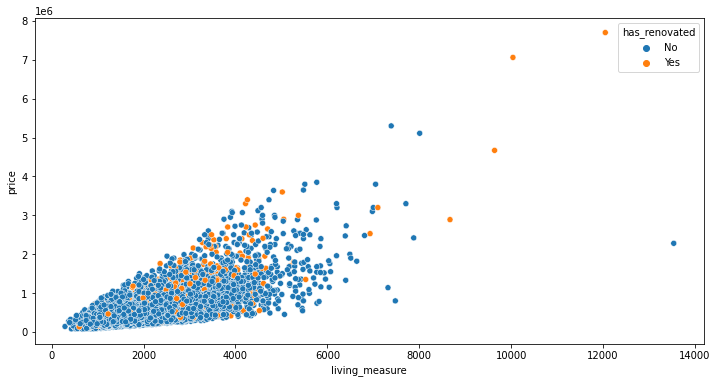

In [86]:
#has_renovated - have higher price & living measure
plt.figure(figsize=(12,6))
x=df[df['yr_built']<2000]
print(sns.scatterplot(x['living_measure'],x['price'],hue=x['has_renovated']))

# Bivariate Analysis of furnished

AxesSubplot(0.125,0.125;0.775x0.755)


price                  living_measure                 \
                    mean    median   size           mean  median   size   
furnished                                                                 
0.0        437403.973628  401000.0  17367    1792.618184  1720.0  17367   
1.0        960565.753179  810000.0   4246    3254.060999  3110.0   4246   

          house_land_ratio                
                      mean median   size  
furnished                                 
0.0              21.506708   19.0  17367  
1.0              24.414508   24.0   4246

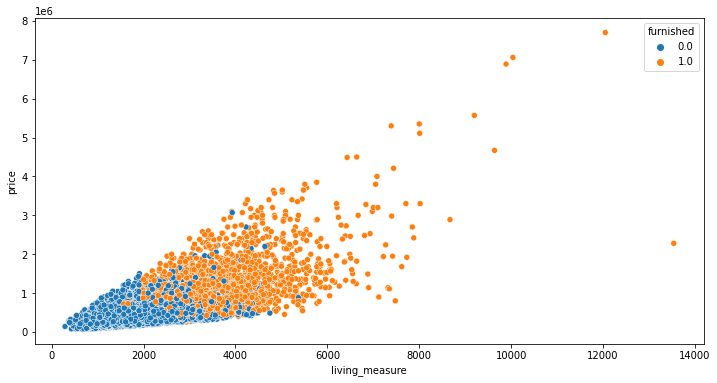

In [87]:
plt.figure(figsize=(12,6))
print(sns.scatterplot(df['living_measure'],df['price'],hue=df['furnished']))
df.groupby('furnished')['price','living_measure','house_land_ratio'].agg(['mean','median','size'])

Furnished has higher price value and has greater living_measure <Br>
Furnished houses have higher price than that of the Non-furnished houses

# Some other analysis

### Looking into the most common house according to number of bedroom 

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

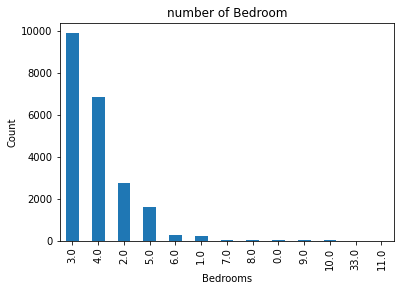

In [88]:
df['room_bed'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

we can clearly see that the houses having 3 and 4 number of bedrooms are higher

# Visualizing the location of the houses based on latitude and longitude.

<Figure size 720x720 with 0 Axes>

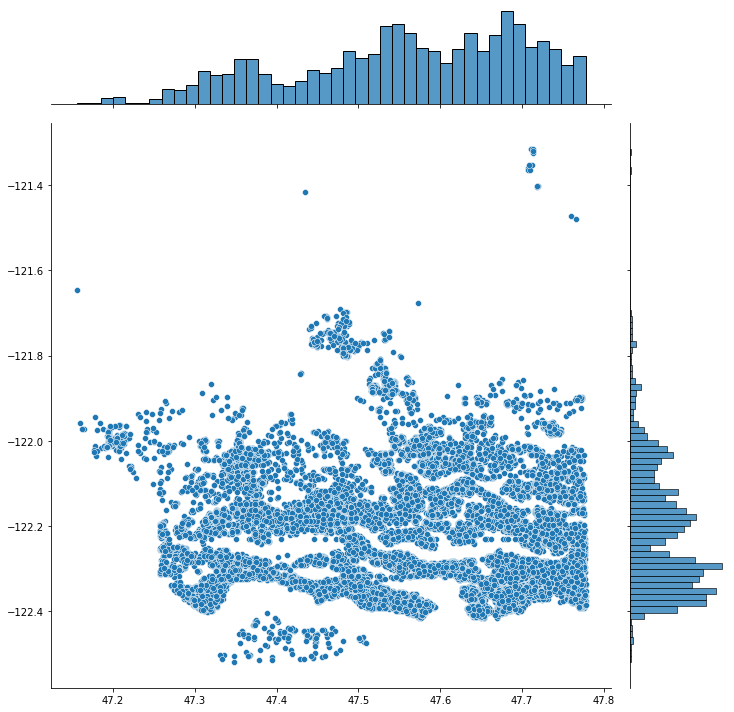

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [89]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

We can see that for latitude between -47.7 and -48.8 and for longitude  between -122.2 to -122.4 there are many houses

# DATA PROCESSING

### Treating Outlilers 
We have seen outliers for columns room_bath(33 bed), living_measure, lot_measure, ceil_measure and Basement 

In [98]:
def outlier_removal(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

Using the above function, lets get the lowerbound and upperbound values

# Removing oultier from ceil_measure

In [99]:
lowerbound,upperbound = outlier_removal(df.ceil_measure)
print(lowerbound,upperbound)

-340.0 3740.0


Lets check which column is considered as an outlier

In [100]:
df[(df.ceil_measure < lowerbound) | (df.ceil_measure > upperbound)]

cid      price  room_bed  room_bath  living_measure  \
17852  7.237550e+09  1230000.0       4.0       4.50          5420.0   
10641  3.892500e+09  1550000.0       3.0       2.50          4460.0   
18983  4.250690e+08  1090000.0       4.0       2.50          4340.0   
10456  7.397300e+09  2750000.0       4.0       3.25          4430.0   
1990   2.616801e+09   840000.0       7.0       4.50          4290.0   
...             ...        ...       ...        ...             ...   
10744  3.751600e+09   510000.0       4.0       2.50          4073.0   
11285  2.424059e+09  2000000.0       4.0       3.25          5640.0   
18840  6.065300e+09  4210000.0       5.0       6.00          7440.0   
9276   1.266200e+09  1850000.0       4.0       3.25          4160.0   
19101  1.623089e+09   920000.0       4.0       3.75          4030.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
17852     101930.0   1.0    0.0    0.0        3.0  ... -122.005   
10641      26027.0   2.0    0.0    0.0        3.0  ... -122.173   
18983     141570.0   2.5    0.0    0.0        3.0  ... -122.048   
10456      21000.0   2.0    0.0    0.0        3.0  ... -122.237   
1990       37607.0   1.5    0.0    0.0        5.0  ... -122.033   
...            ...   ...    ...    ...        ...  ...      ...   
10744      17334.0   2.0    0.0    0.0        3.0  ... -122.270   
11285      35006.0   2.0    0.0    2.0        3.0  ... -122.104   
18840      21540.0   2.0    0.0    0.0        3.0  ... -122.189   
9276       10335.0   2.0    0.0    0.0        3.0  ... -122.192   
19101     503989.0   2.0    0.0    0.0        3.0  ... -121.795   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
17852            4760.0       101930.0        1.0    107350.0 2014-05-12   
10641            3770.0        26027.0        1.0     30487.0 2014-05-21   
18983            2720.0        97138.0        1.0    145910.0 2014-05-05   
10456            3930.0        20000.0        1.0     25430.0 2014-05-29   
1990             2810.0        40510.0        1.0     41897.0 2014-05-30   
...                 ...            ...        ...         ...        ...   
10744            1780.0         9625.0        0.0     21407.0 2015-05-08   
11285            4920.0        35033.0        1.0     40646.0 2015-05-08   
18840            4740.0        19329.0        1.0     28980.0 2015-05-06   
9276             1840.0        10333.0        1.0     14495.0 2015-05-06   
19101            2110.0        71874.0        1.0    508019.0 2015-05-06   

       month/year  has_basement  house_land_ratio  has_renovated  
17852    May/2014           Yes               5.0             No  
10641    May/2014            No              15.0             No  
18983    May/2014            No               3.0             No  
10456    May/2014            No              17.0            Yes  
1990     May/2014            No              10.0             No  
...           ...           ...               ...            ...  
10744    May/2015            No              19.0             No  
11285    May/2015           Yes              14.0             No  
18840    May/2015           Yes              26.0             No  
9276     May/2015            No              29.0             No  
19101    May/2015            No               1.0             No  

[611 rows x 27 columns]

We got 611 records which are outliers

In [101]:
# dropping the record from the dataset
df.drop(df[ (df.ceil_measure > upperbound) | (df.ceil_measure < lowerbound) ].index, inplace=True)

In [102]:
df.shape

(21002, 27)

Skewness is : 0.8200505904266921


count    21002.000000
mean      1712.202457
std        696.032643
min        290.000000
25%       1180.000000
50%       1540.000000
75%       2140.000000
max       3740.000000
Name: ceil_measure, dtype: float64

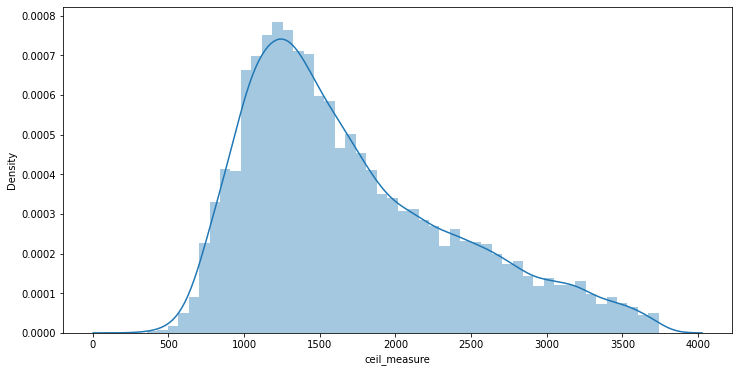

In [103]:
# ceil_measure
print("Skewness is :", df.ceil_measure.skew())
plt.figure(figsize=(12,6))
sns.distplot(df.ceil_measure)
df.ceil_measure.describe()

After treating outliers of ceil_measure, the data has reduced by about 600(~3%) data points but data is nicely distributed

# Removing oultier from basement

In [104]:
lowerbound_base,upperbound_base = outlier_removal(df.basement)
print(lowerbound_base,upperbound_base)

-855.0 1425.0


In [105]:
df[(df.basement < lowerbound_base) | (df.basement > upperbound_base)]

cid      price  room_bed  room_bath  living_measure  \
1724   1.424059e+09  1270000.0       4.0       3.00          5520.0   
1576   5.152100e+09   472000.0       6.0       2.50          4410.0   
20475  9.322800e+09   879950.0       4.0       2.25          3500.0   
4347   3.623500e+09  2450000.0       4.0       4.50          5030.0   
4400   7.784400e+09   497300.0       6.0       2.75          3200.0   
...             ...        ...       ...        ...             ...   
2506   7.964410e+09   700000.0       4.0       3.50          5360.0   
4016   1.742800e+09   463828.0       5.0       1.75          3250.0   
9621   1.822079e+09   500000.0       3.0       2.00          3040.0   
4248   1.925069e+09  2200000.0       5.0       4.25          4640.0   
3365   2.524049e+09  1380000.0       5.0       4.25          4050.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
1724        8313.0   2.0    0.0    3.0        3.0  ... -122.129   
1576       14034.0   1.0    0.0    2.0        4.0  ... -122.324   
20475      13875.0   1.0    0.0    4.0        4.0  ... -122.388   
4347       11023.0   2.0    0.0    2.0        3.0  ... -122.236   
4400        9200.0   1.0    0.0    2.0        4.0  ... -122.364   
...            ...   ...    ...    ...        ...  ...      ...   
2506       25800.0   1.0    0.0    0.0        3.0  ... -122.054   
4016       13702.0   1.0    0.0    2.0        3.0  ... -122.225   
9621       41072.0   1.0    0.0    0.0        4.0  ... -121.972   
4248       22703.0   2.0    1.0    4.0        5.0  ... -122.097   
3365       18827.0   1.0    0.0    2.0        4.0  ... -122.237   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
1724             3770.0         8278.0        1.0     13833.0 2014-05-16   
1576             2600.0        13988.0        1.0     18444.0 2014-05-29   
20475            2960.0        15000.0        1.0     17375.0 2014-05-20   
4347             3640.0        11490.0        1.0     16053.0 2014-05-13   
4400             2220.0         9500.0        0.0     12400.0 2014-05-05   
...                 ...            ...        ...         ...        ...   
2506             2650.0        21781.0        1.0     31160.0 2015-05-04   
4016             2620.0        11328.0        0.0     16952.0 2015-05-04   
9621             2230.0        54014.0        0.0     44112.0 2015-05-04   
4248             3140.0        14200.0        0.0     27343.0 2015-05-11   
3365             3600.0        25120.0        1.0     22877.0 2015-05-12   

       month/year  has_basement  house_land_ratio  has_renovated  
1724     May/2014           Yes              40.0             No  
1576     May/2014           Yes              24.0             No  
20475    May/2014           Yes              20.0             No  
4347     May/2014           Yes              31.0             No  
4400     May/2014           Yes              26.0             No  
...           ...           ...               ...            ...  
2506     May/2015           Yes              17.0             No  
4016     May/2015           Yes              19.0             No  
9621     May/2015           Yes               7.0             No  
4248     May/2015           Yes              17.0             No  
3365     May/2015           Yes              18.0             No  

[408 rows x 27 columns]

 We got 408 records as outliers, let's drop these outliers

In [106]:
# dropping the record from the dataset
df.drop(df[ (df.basement > upperbound_base) | (df.basement < lowerbound_base) ].index, inplace=True)

In [107]:
df.shape

(20594, 27)

<AxesSubplot:xlabel='basement', ylabel='Density'>

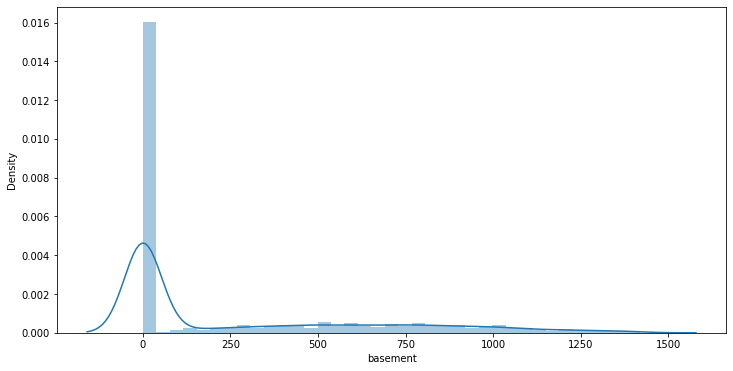

In [108]:
# basement_measure
plt.figure(figsize=(12,6))
sns.distplot(df.basement)

After treating outliers of basement, we can see that 400(~2%) data points got imputed. Total about 5% data has been imputed after treating ceil_measure and basement.

<AxesSubplot:xlabel='basement'>

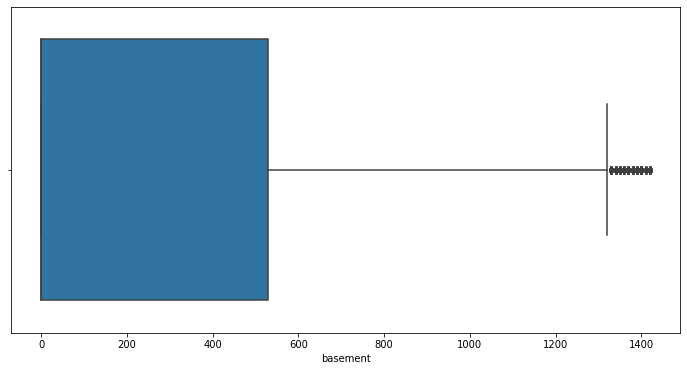

In [109]:
# boxplot now for basement
plt.figure(figsize=(12,6))
sns.boxplot(df['basement'])

# Removing oultier from living_measure

In [110]:
lowerbound_lim,upperbound_lim = outlier_removal(df.living_measure)
print(lowerbound_lim,upperbound_lim)

-160.0 4000.0


In [111]:
df[(df.living_measure < lowerbound_lim) | (df.living_measure > upperbound_lim)]

cid      price  room_bed  room_bath  living_measure  \
14696  7.230001e+08  1400000.0       5.0       3.50          4010.0   
9776   2.516201e+08  2400000.0       4.0       3.25          4140.0   
15200  1.338600e+09  1970000.0       8.0       3.50          4440.0   
2693   8.562710e+09   890000.0       4.0       4.25          4420.0   
13385  3.758900e+09  1530000.0       5.0       4.50          4270.0   
...             ...        ...       ...        ...             ...   
18375  8.562720e+09  1350000.0       4.0       3.50          4740.0   
8258   2.421059e+09   640000.0       4.0       2.50          4090.0   
9506   1.525069e+09   442500.0       5.0       3.25          4240.0   
14071  5.428000e+09   770000.0       5.0       3.50          4750.0   
9931   1.118000e+09  3400000.0       4.0       4.00          4260.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
14696       8510.0   2.0    0.0    1.0        5.0  ... -122.286   
9776       20734.0   1.0    0.0    1.0        3.0  ... -122.215   
15200       6480.0   2.0    0.0    3.0        5.0  ... -122.303   
2693        5750.0   2.0    0.0    0.0        3.0  ... -122.073   
13385       8076.0   2.0    0.0    0.0        3.0  ... -122.206   
...            ...   ...    ...    ...        ...  ...      ...   
18375       8611.0   2.0    0.0    3.0        3.0  ... -122.070   
8258      215186.0   2.0    0.0    0.0        4.0  ... -122.116   
9506      226097.0   2.0    0.0    0.0        3.0  ... -122.017   
14071       8234.0   2.0    0.0    2.0        3.0  ... -122.318   
9931       11765.0   2.0    0.0    0.0        3.0  ... -122.288   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
14696            2610.0         6128.0        1.0     12520.0 2014-05-05   
9776             4020.0        20008.0        1.0     24874.0 2014-05-30   
15200            4440.0         8640.0        1.0     10920.0 2014-05-28   
2693             4420.0         5750.0        1.0     10170.0 2014-05-05   
13385            4100.0        10631.0        1.0     12346.0 2014-05-07   
...                 ...            ...        ...         ...        ...   
18375            4042.0         8321.0        1.0     13351.0 2015-04-30   
8258             2430.0       142005.0        0.0    219276.0 2015-05-11   
9506             2980.0       217800.0        0.0    230337.0 2015-05-04   
14071            2160.0        14496.0        1.0     12984.0 2015-05-11   
9931             4260.0        10408.0        1.0     16025.0 2015-05-08   

       month/year  has_basement  house_land_ratio  has_renovated  
14696    May/2014           Yes              32.0             No  
9776     May/2014           Yes              17.0            Yes  
15200    May/2014           Yes              41.0             No  
2693     May/2014           Yes              43.0             No  
13385    May/2014           Yes              35.0             No  
...           ...           ...               ...            ...  
18375  April/2015           Yes              36.0             No  
8258     May/2015           Yes               2.0             No  
9506     May/2015           Yes               2.0             No  
14071    May/2015           Yes              37.0             No  
9931     May/2015           Yes              27.0            Yes  

[178 rows x 27 columns]

We got 178 records as outliers. Let's treat this by dropping

In [112]:
# dropping the record from the dataset
df.drop(df[ (df.living_measure > upperbound_lim) | (df.living_measure < lowerbound_lim) ].index, inplace=True)

<AxesSubplot:xlabel='living_measure'>

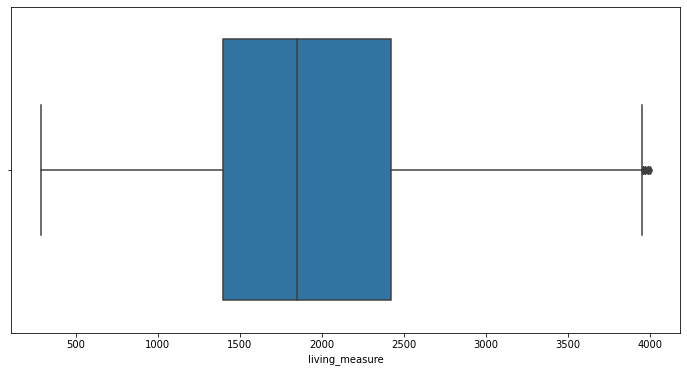

In [113]:
# boxplot after dropping the outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['living_measure'])

<AxesSubplot:xlabel='living_measure', ylabel='Density'>

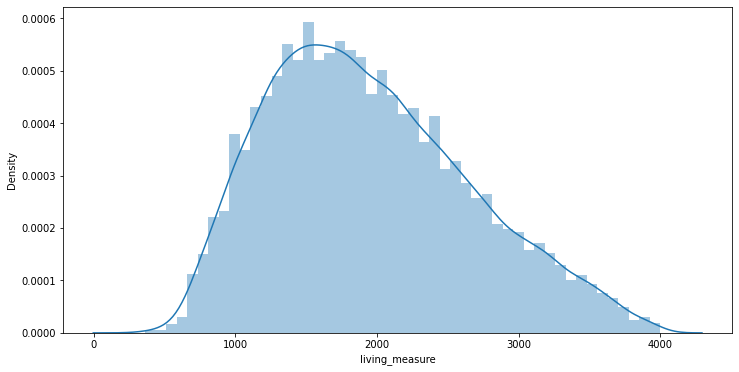

In [114]:
plt.figure(figsize=(12,6))
sns.distplot(df.living_measure)

 By treating outliers of living_measure, we lost 178 data points more and data distribution looks normal

In [115]:
# shape of the data after removing outliers in living_column
df.shape

(20416, 27)

# Removing oultier from lot_measure

In [116]:
lowerbound_lom,upperbound_lom = outlier_removal(df.lot_measure)
print(lowerbound_lom,upperbound_lom)

-2768.5 17947.5


In [117]:
df[(df.lot_measure < lowerbound_lom) | (df.lot_measure > upperbound_lom)]

cid     price  room_bed  room_bath  living_measure  \
20407  3.200690e+08  305000.0       4.0       1.50          1590.0   
10566  2.322069e+09  630000.0       3.0       2.50          2680.0   
1718   3.323059e+09  326000.0       3.0       2.75          1720.0   
18962  5.875503e+08  604000.0       3.0       2.50          3240.0   
20401  1.240690e+08  600000.0       3.0       1.75          1670.0   
...             ...       ...       ...        ...             ...   
17539  7.932000e+09  602500.0       2.0       2.50          3090.0   
13854  1.324079e+09  378000.0       3.0       1.50          1050.0   
20733  5.561000e+09  525000.0       3.0       1.75          2620.0   
19141  6.260592e+08  532500.0       4.0       2.00          2220.0   
13811  4.027701e+09  480000.0       3.0       1.75          2920.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
20407     131551.0   1.0    0.0    3.0        4.0  ... -122.024   
10566     327135.0   2.0    0.0    0.0        3.0  ... -122.003   
1718       28000.0   1.0    0.0    0.0        4.0  ... -122.176   
18962      33151.0   2.0    0.0    2.0        3.0  ... -122.378   
20401      39639.0   1.0    0.0    0.0        4.0  ... -121.989   
...            ...   ...    ...    ...        ...  ...      ...   
17539      47044.0   1.0    0.0    0.0        4.0  ... -122.177   
13854      57499.0   1.0    0.0    0.0        3.0  ... -121.860   
20733      38350.0   1.0    0.0    0.0        4.0  ... -121.991   
19141      23750.0   1.0    0.0    0.0        3.0  ... -122.214   
13811      21375.0   1.0    0.0    0.0        3.0  ... -122.265   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
20407            2280.0       108028.0        0.0    133141.0 2014-05-14   
10566            2020.0        60080.0        0.0    329815.0 2014-05-07   
1718             2000.0        41817.0        0.0     29720.0 2014-05-28   
18962            4050.0        24967.0        1.0     36391.0 2014-05-02   
20401            2330.0        30492.0        0.0     41309.0 2014-05-05   
...                 ...            ...        ...         ...        ...   
17539            1860.0        62829.0        1.0     50134.0 2015-05-12   
13854            1460.0        42688.0        0.0     58549.0 2015-05-04   
20733            2170.0        36962.0        0.0     40970.0 2015-05-05   
19141            2650.0        21167.0        0.0     25970.0 2015-05-06   
13811            1540.0         8482.0        0.0     24295.0 2015-05-01   

       month/year  has_basement  house_land_ratio  has_renovated  
20407    May/2014            No               1.0             No  
10566    May/2014            No               1.0             No  
1718     May/2014            No               6.0             No  
18962    May/2014            No               9.0             No  
20401    May/2014            No               4.0            Yes  
...           ...           ...               ...            ...  
17539    May/2015           Yes               6.0             No  
13854    May/2015            No               2.0             No  
20733    May/2015           Yes               6.0             No  
19141    May/2015            No               9.0             No  
13811    May/2015           Yes              12.0             No  

[2124 rows x 27 columns]

 We got 2155 records which are outliers. Let's drop these outlier records.

In [118]:
# dropping the record from the dataset
df.drop(df[ (df.lot_measure > upperbound_lom) | (df.lot_measure < lowerbound_lom) ].index, inplace=True)

<AxesSubplot:xlabel='lot_measure'>

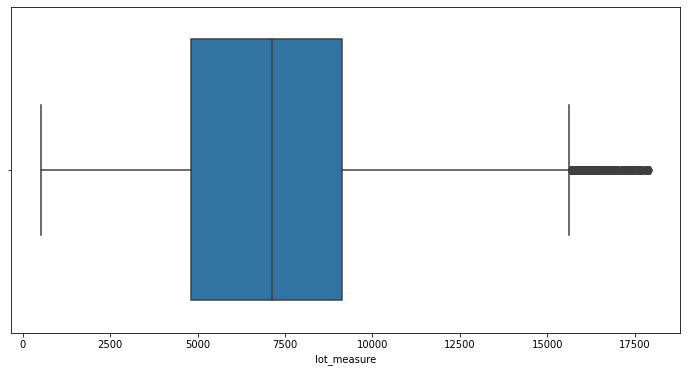

In [119]:
# plotting after removing outliers
plt.figure(figsize=(12,6))
sns.boxplot(df['lot_measure'])

In [120]:
df.shape

(18292, 27)

Total outliers in the lot_measure are 2128 data points. But still we are going ahead with imputing the data. We will analyze later whether there is any impact on the data set or not. 

# Removing oultier from room_bed

In [121]:
#As we know for room_bed = 33 was outlier from our earlier findings, let's see the record and drop it
df[df['room_bed']==33]

cid     price  room_bed  room_bath  living_measure  \
16913  2.402101e+09  640000.0      33.0       1.75          1620.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
16913       6000.0   1.0    0.0    0.0        5.0  ... -122.331   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
16913            1330.0         4700.0        0.0      7620.0 2014-06-25   

       month/year  has_basement  house_land_ratio  has_renovated  
16913   June/2014           Yes              21.0             No  

[1 rows x 27 columns]

In [122]:
# dropping the record from the dataset
df.drop(df[ (df.room_bed == 33) ].index, inplace=True)

In [123]:
df.shape

(18291, 27)

 In summary, after treating outliers, we have lost about 15% of the data. We will analyse the impact of this data loss during the model evaluation.

In [124]:
#let's see the feature/columns and drop the unneccessary features
df.columns

Index(['cid', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'dayhours', 'month/year', 'has_basement',
       'house_land_ratio', 'has_renovated'],
      dtype='object')

As we already have this information in other features. We will drop the unwanted columns from new copied dataframe instance : cid,dayhours,yr_renovated,zipcode,lat,long,county,type

In [125]:
# Creating another dataframe for modeling part which we use later
df_model=df.copy()

In [126]:
df_model.head()

cid     price  room_bed  room_bath  living_measure  \
12235  1.425059e+09  460000.0       3.0       2.00          1760.0   
14791  7.942601e+09  345600.0       5.0       3.50          2800.0   
1742   5.652600e+09  750000.0       3.0       1.75          2240.0   
17829  3.529200e+09  325000.0       3.0       2.50          2220.0   
14810  5.631501e+09  390000.0       3.0       2.50          2240.0   

       lot_measure  ceil  coast  sight  condition  ...     long  \
12235       9055.0   2.0    0.0    0.0        4.0  ... -122.128   
14791       5120.0   2.5    0.0    0.0        3.0  ... -122.310   
1742       10578.0   2.0    0.0    0.0        5.0  ... -122.292   
17829       6049.0   2.0    0.0    0.0        4.0  ... -122.182   
14810      10800.0   2.0    0.0    0.0        3.0  ... -122.229   

       living_measure15  lot_measure15  furnished  total_area   dayhours  \
12235            2010.0         9383.0        0.0     10815.0 2014-05-07   
14791            1780.0         5120.0        1.0      7920.0 2014-05-20   
1742             1570.0        10578.0        0.0     12818.0 2014-05-02   
17829            1980.0         7226.0        0.0      8269.0 2014-05-14   
14810            1900.0         9900.0        0.0     13040.0 2014-05-15   

       month/year  has_basement  house_land_ratio  has_renovated  
12235    May/2014            No              16.0             No  
14791    May/2014            No              35.0            Yes  
1742     May/2014           Yes              17.0             No  
17829    May/2014            No              27.0             No  
14810    May/2014            No              17.0             No  

[5 rows x 27 columns]

New instance of dataframe for model created successfully

In [127]:
#let's verify the columns
df_model.columns

Index(['cid', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area', 'dayhours', 'month/year', 'has_basement',
       'house_land_ratio', 'has_renovated'],
      dtype='object')

In [128]:
#Dropping the feature not required in 1st Iteration
df_final=df_model.drop(['cid','yr_renovated','zipcode','lat','long',],axis=1)

In [129]:
df_final.shape

(18291, 22)

In [130]:
df_final.head()

price  room_bed  room_bath  living_measure  lot_measure  ceil  \
12235  460000.0       3.0       2.00          1760.0       9055.0   2.0   
14791  345600.0       5.0       3.50          2800.0       5120.0   2.5   
1742   750000.0       3.0       1.75          2240.0      10578.0   2.0   
17829  325000.0       3.0       2.50          2220.0       6049.0   2.0   
14810  390000.0       3.0       2.50          2240.0      10800.0   2.0   

       coast  sight  condition  quality  ...  yr_built  living_measure15  \
12235    0.0    0.0        4.0      7.0  ...    1985.0            2010.0   
14791    0.0    0.0        3.0      9.0  ...    1903.0            1780.0   
1742     0.0    0.0        5.0      8.0  ...    1923.0            1570.0   
17829    0.0    0.0        4.0      8.0  ...    1990.0            1980.0   
14810    0.0    0.0        3.0      8.0  ...    1996.0            1900.0   

       lot_measure15  furnished  total_area   dayhours  month/year  \
12235         9383.0        0.0     10815.0 2014-05-07    May/2014   
14791         5120.0        1.0      7920.0 2014-05-20    May/2014   
1742         10578.0        0.0     12818.0 2014-05-02    May/2014   
17829         7226.0        0.0      8269.0 2014-05-14    May/2014   
14810         9900.0        0.0     13040.0 2014-05-15    May/2014   

      has_basement house_land_ratio has_renovated  
12235           No             16.0            No  
14791           No             35.0           Yes  
1742           Yes             17.0            No  
17829           No             27.0            No  
14810           No             17.0            No  

[5 rows x 22 columns]

In [131]:
df_final.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'living_measure15', 'lot_measure15',
       'furnished', 'total_area', 'dayhours', 'month/year', 'has_basement',
       'house_land_ratio', 'has_renovated'],
      dtype='object')